# EDS map quantification and phase analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemMap as cm
import mineralML as mm


%matplotlib inline
%config InlineBackend.figure_format = 'retina'


Load standard data, true standard compositions and create calibration lines ("apply_correction = False" indicates that no correction will be applied to the data on the basis of these standard analyses)

In [2]:
Minerals, Stds, Stds_raw, base_corr, base_inte = cm.create_calibration('Data/LargeScaleMaps/Standards/', background_correction = True, apply_correction = False)

Use these calibration lines to calculate the apparent concentration of the standards from the performed analyses.

In [3]:
Conc = cm.check_stds(Minerals, base_corr, base_inte)

Plot the calibration lines against the standard compositions.

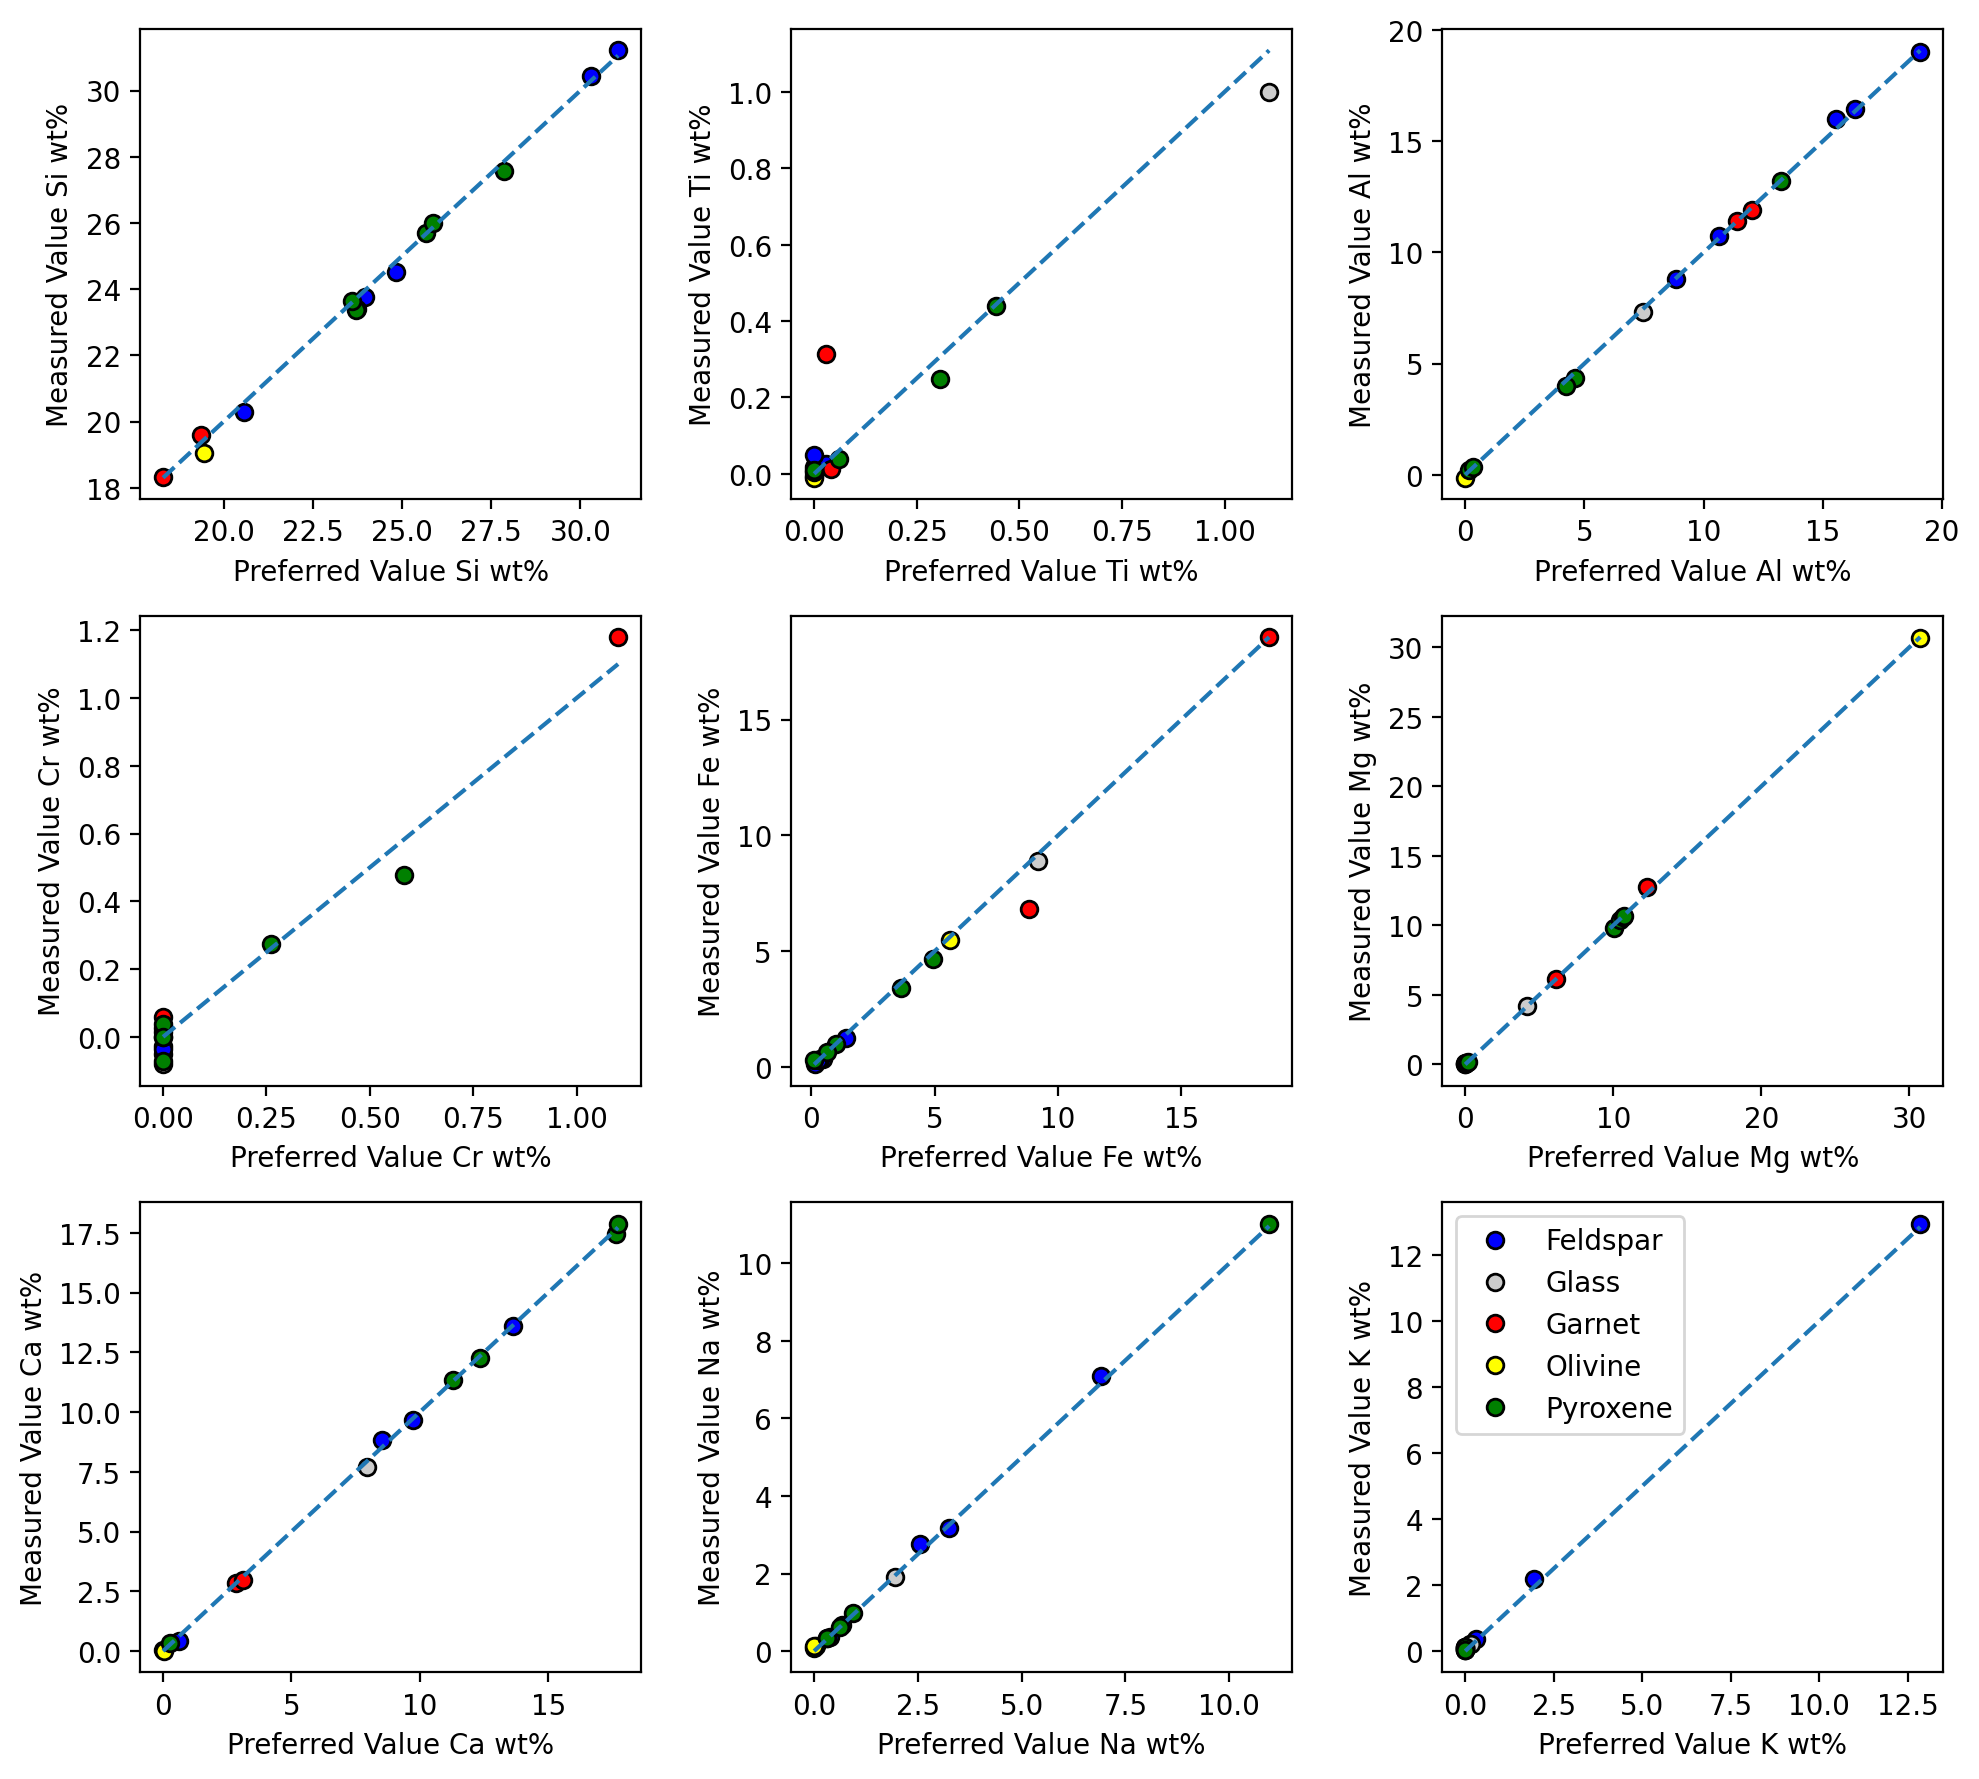

In [5]:
el = [['Si', 'Ti', 'Al'],['Cr', 'Fe', 'Mg'],['Ca', 'Na', 'K']]
MFC={'Feldspar': 'blue', 'Glass': [0.8,0.8,0.8], 'Garnet': 'red', 'Olivine': 'yellow', 'Pyroxene': 'green'}
cm.plot_std_corr(Stds, Stds_raw, el, base_corr, base_inte, MFC = MFC)

Compare the predicted compositions against the known standard compositions

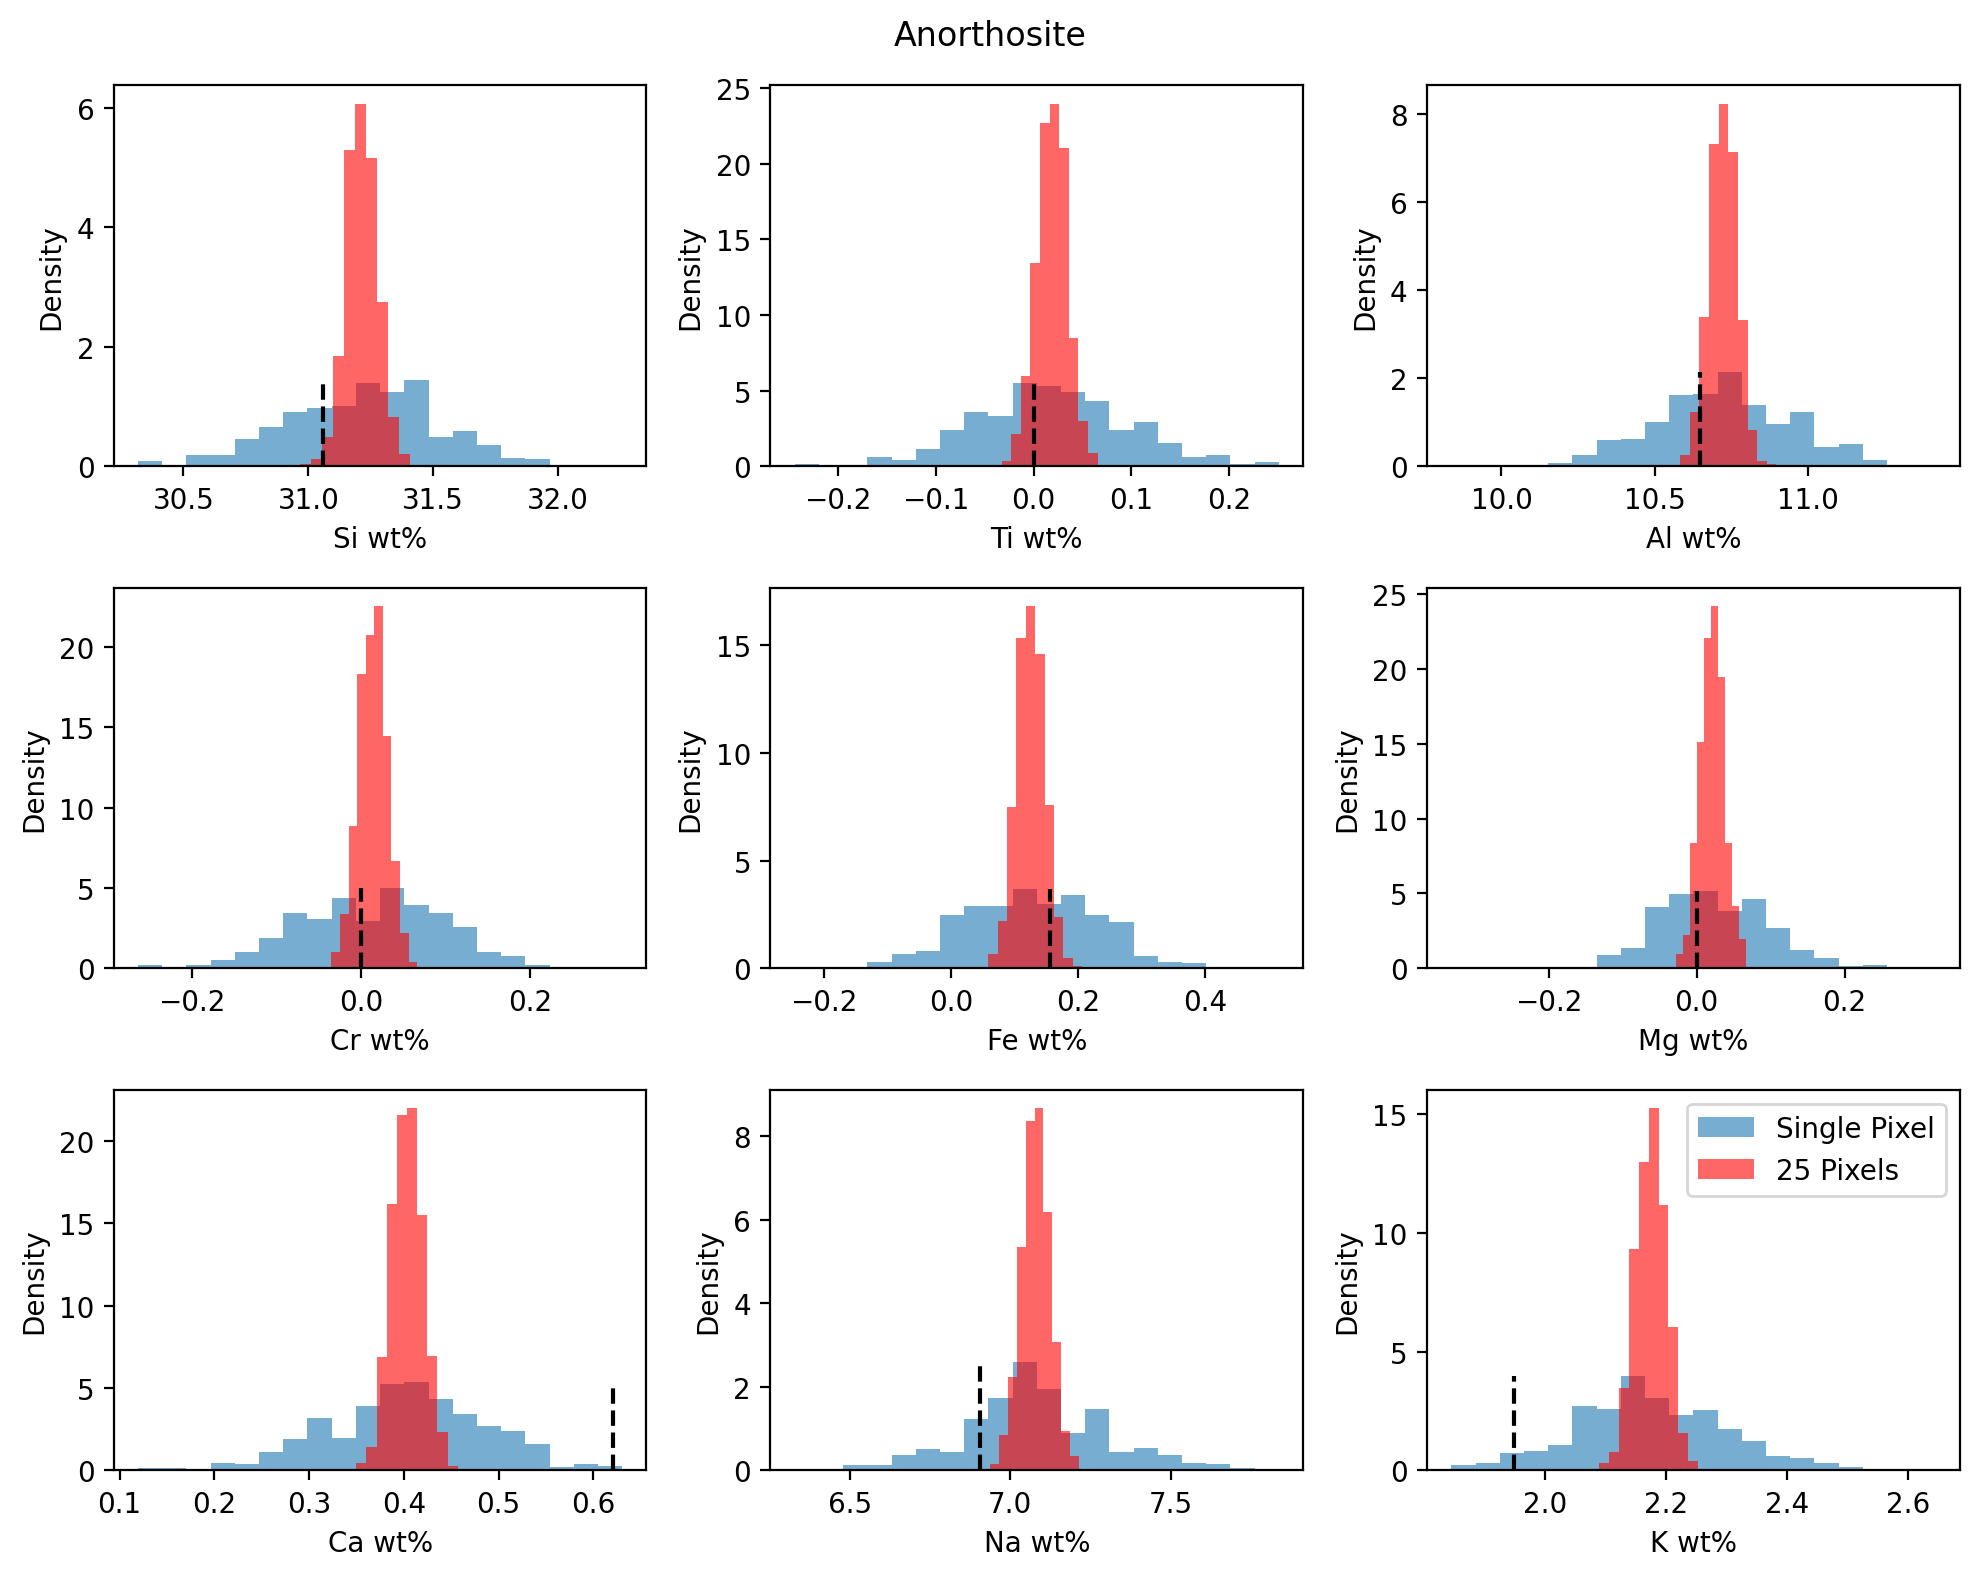

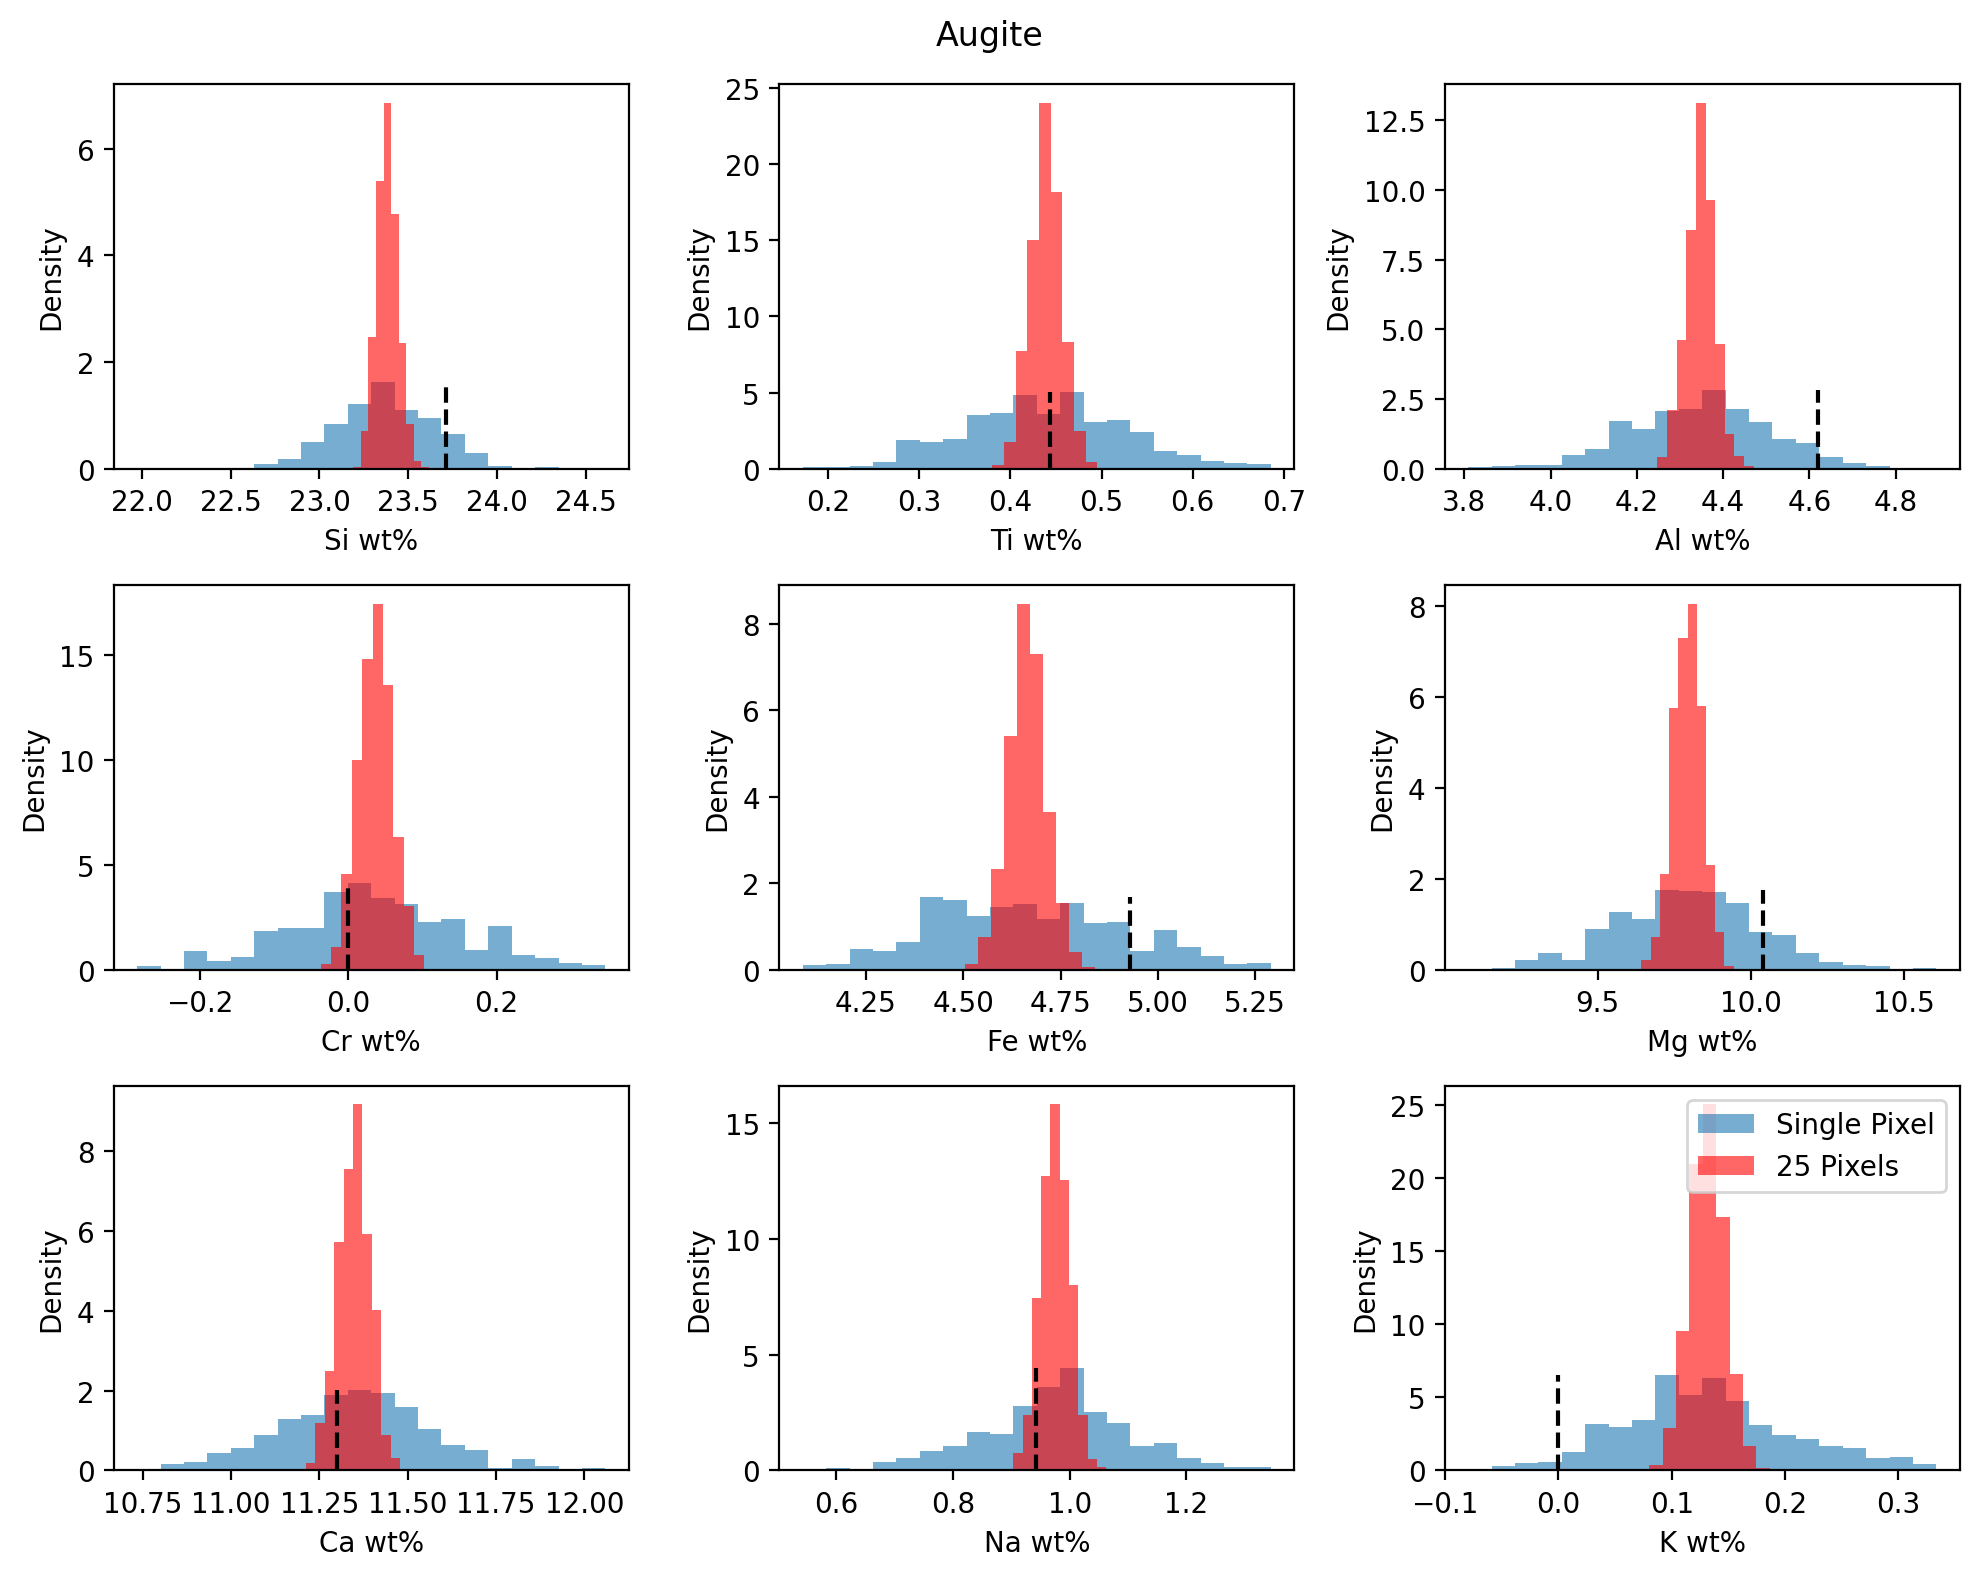

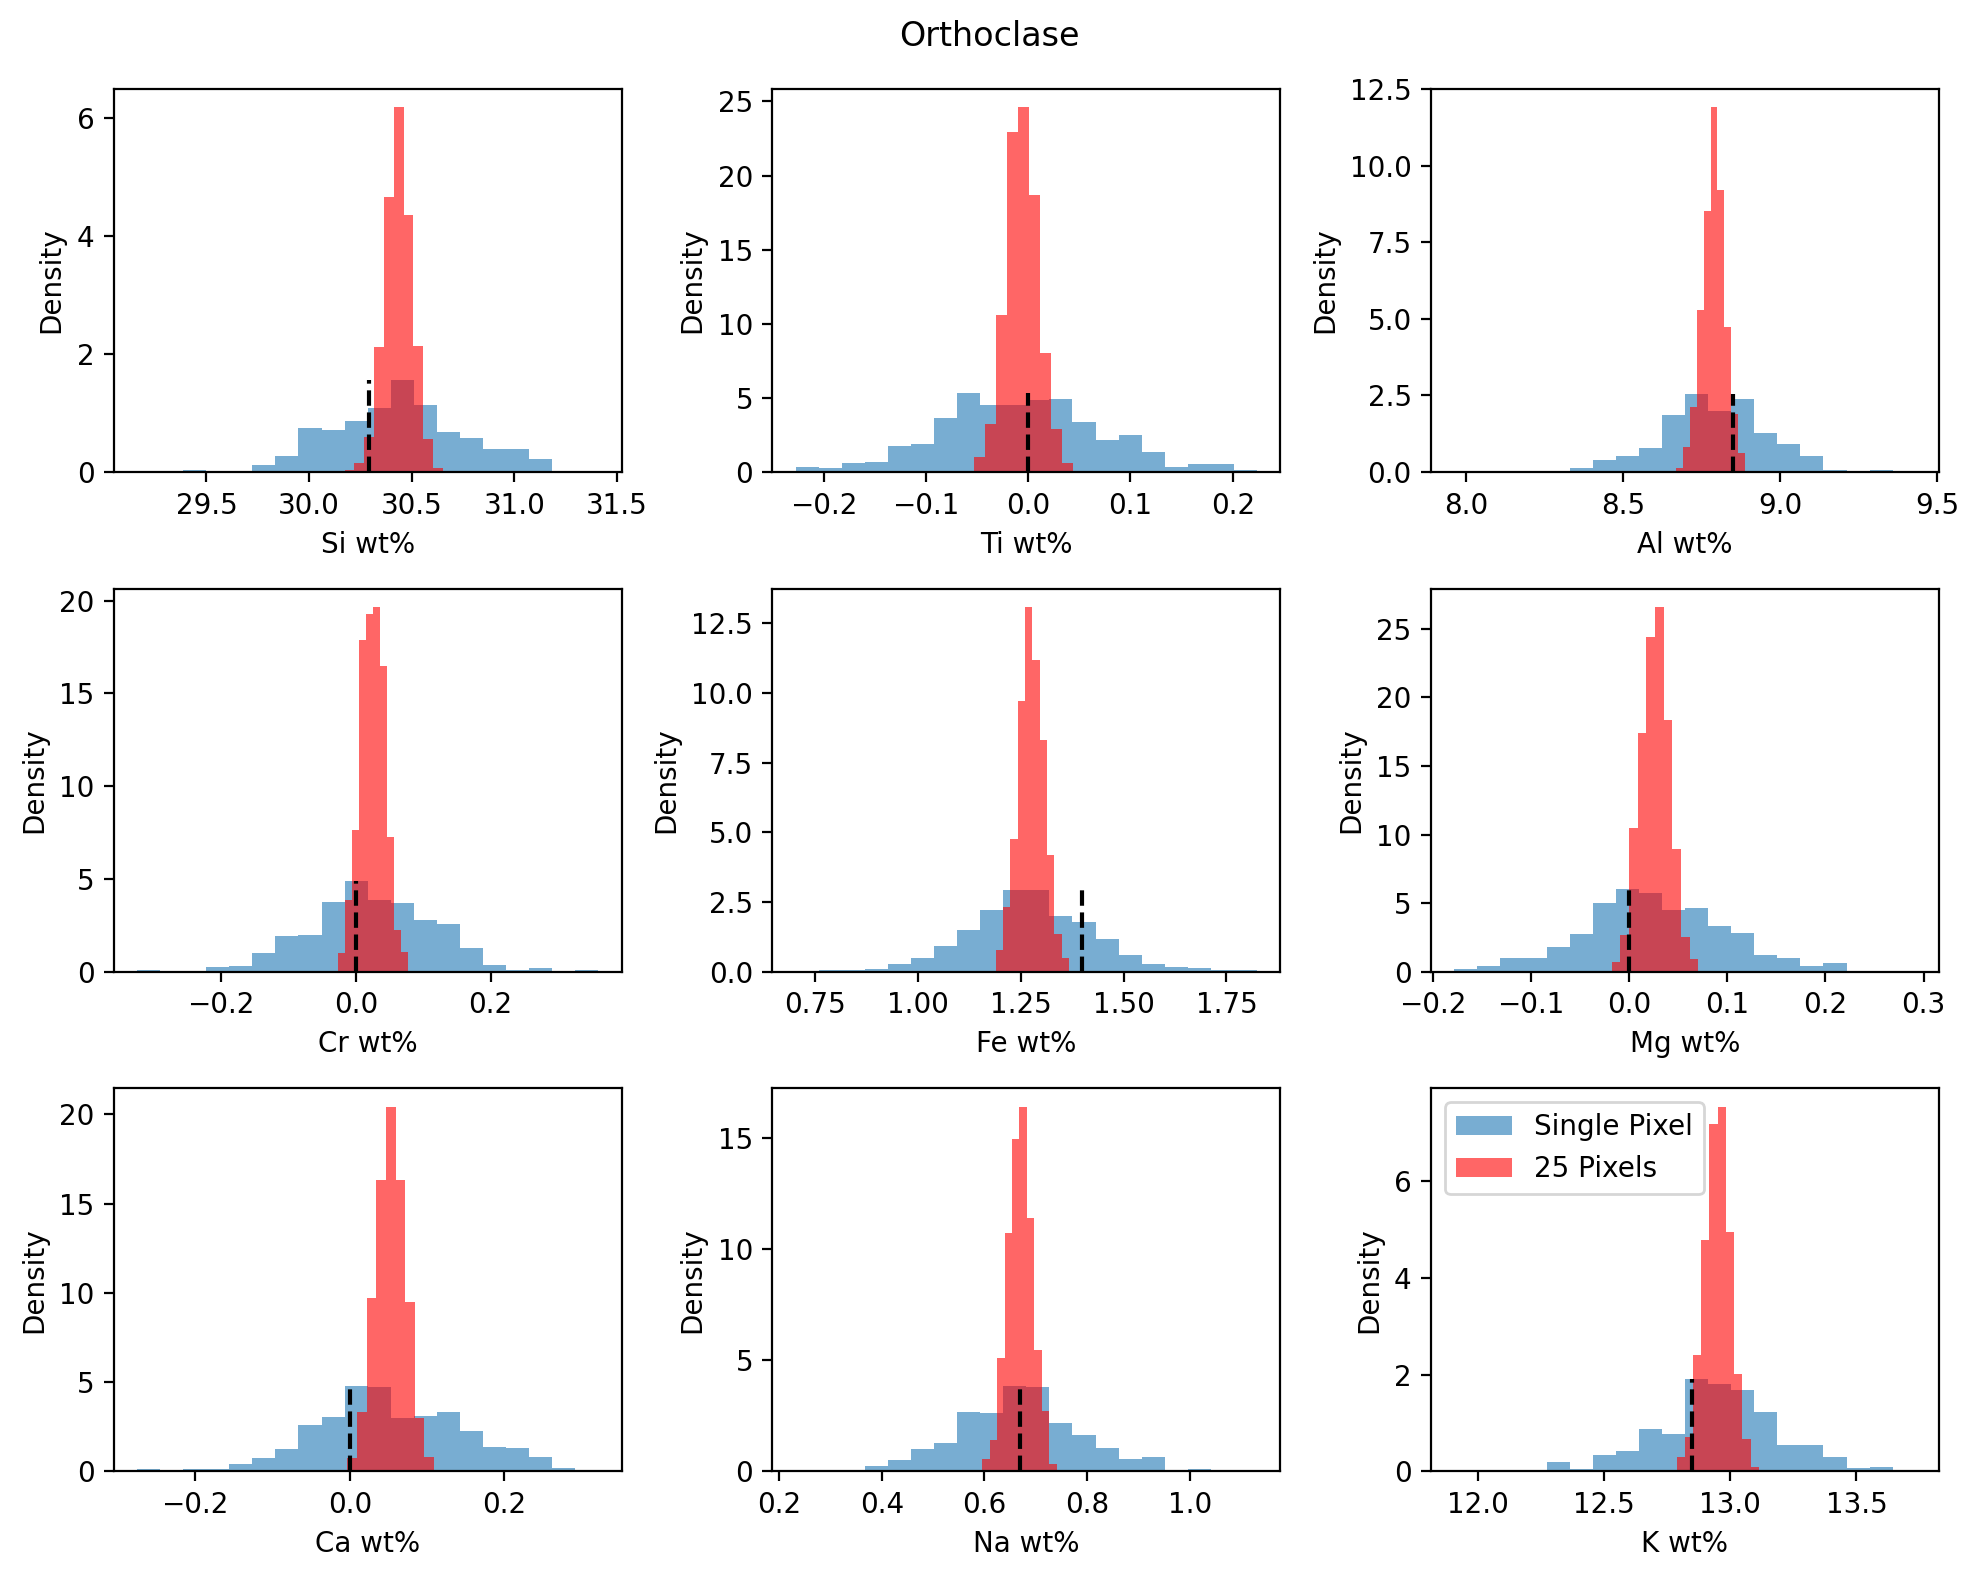

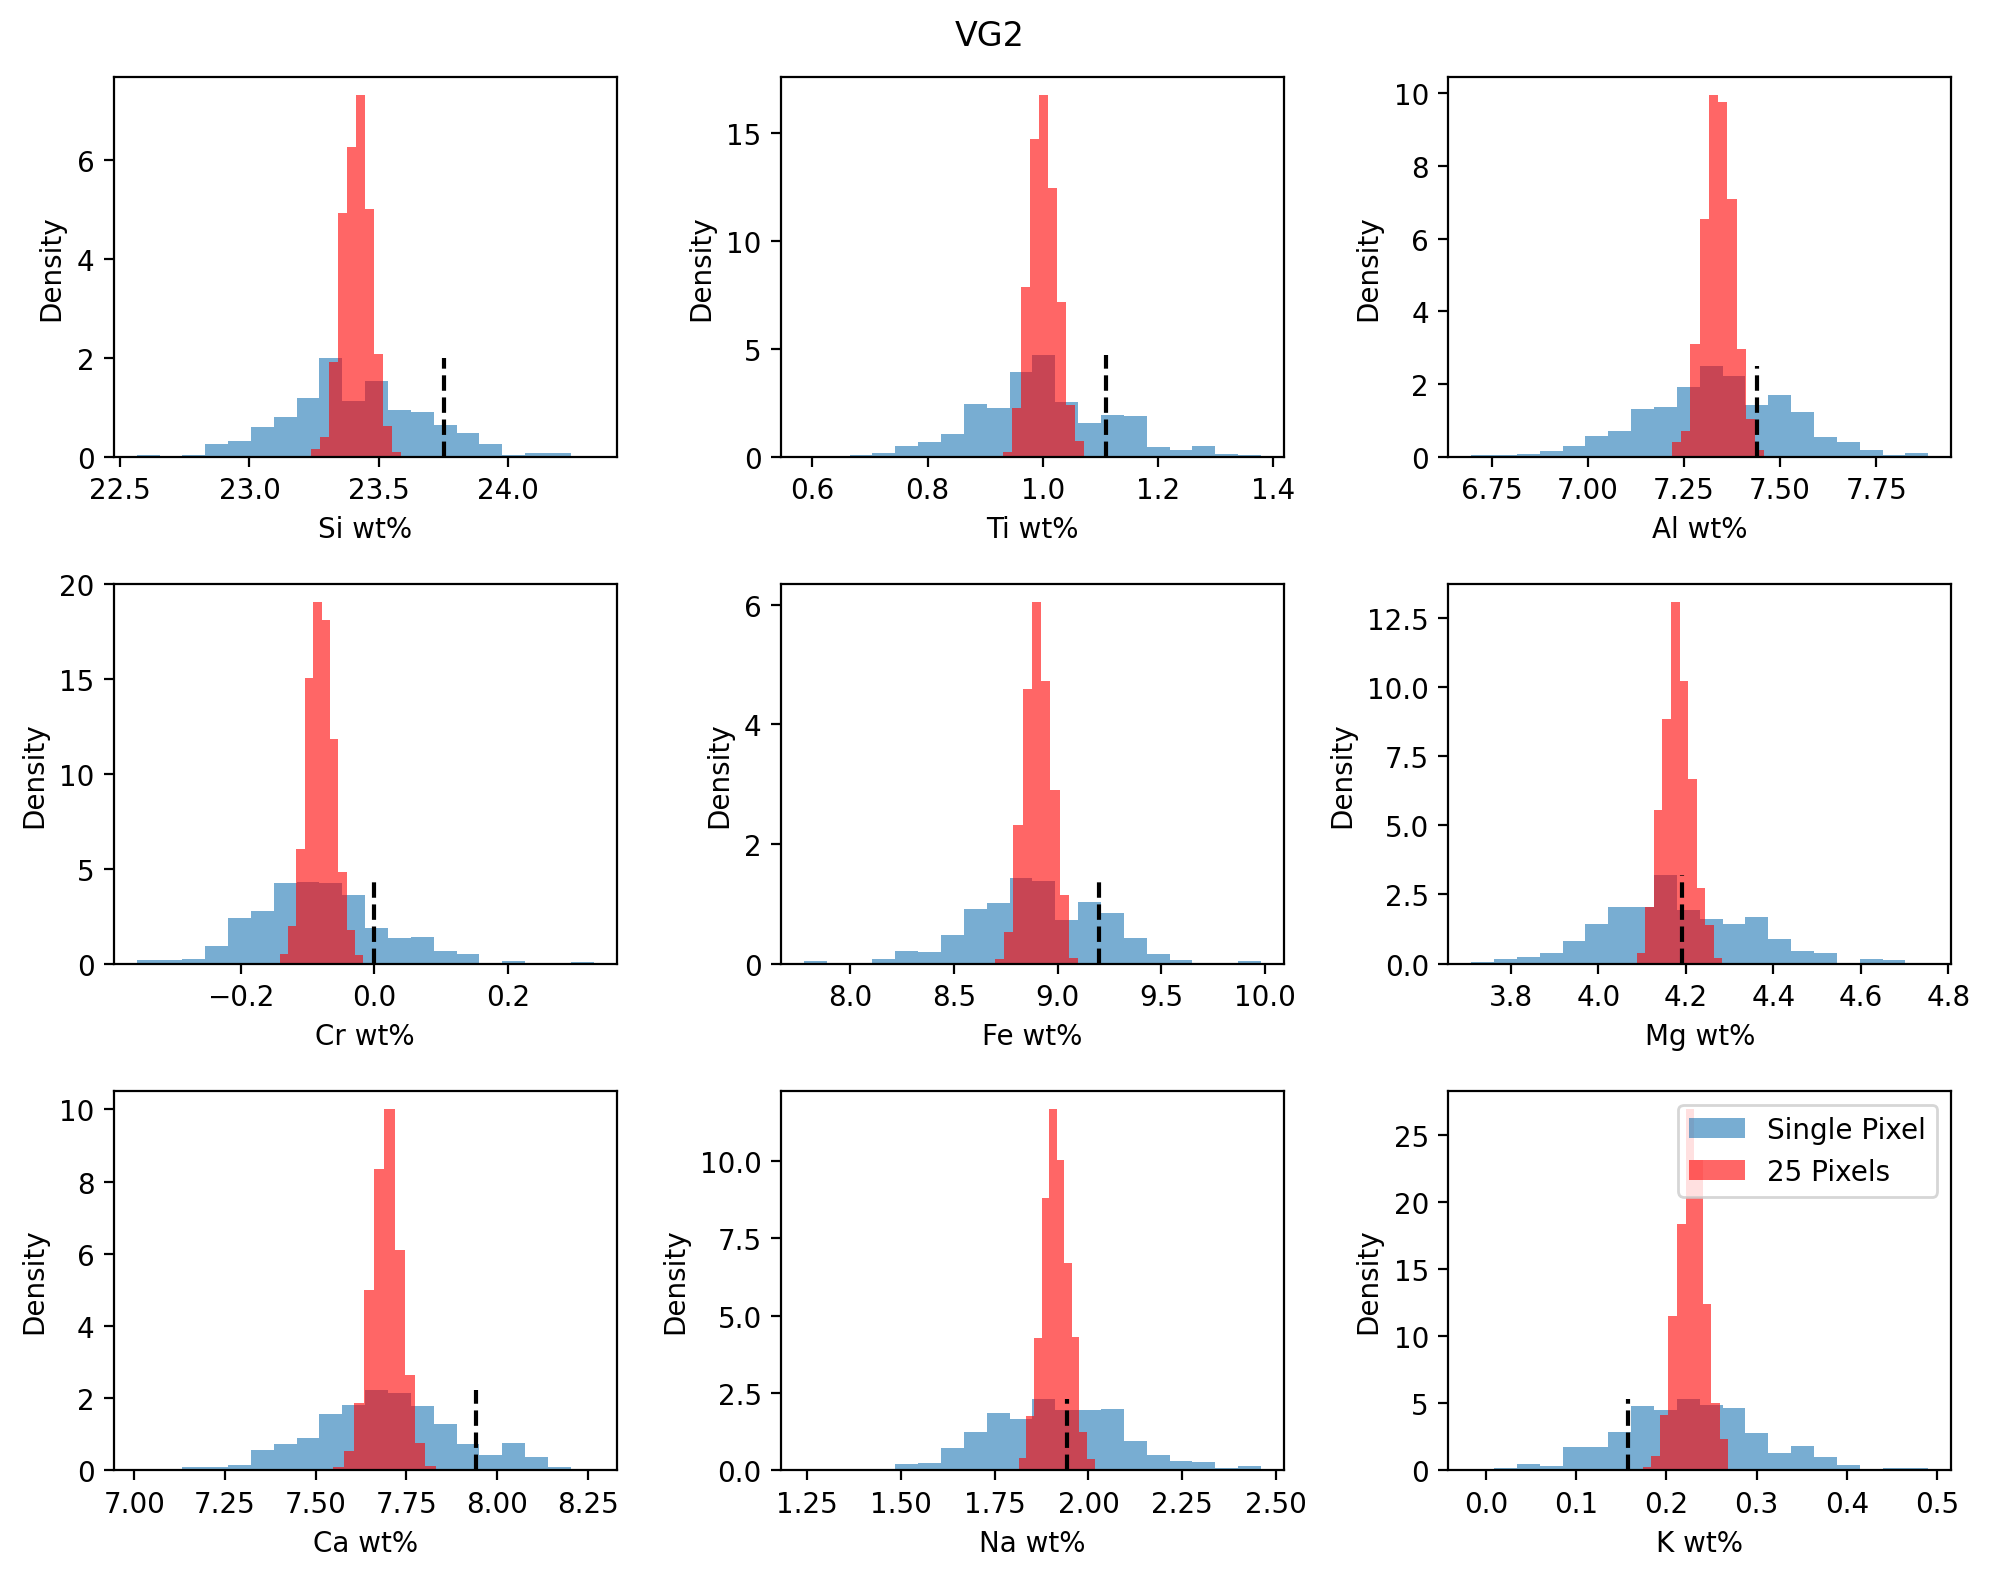

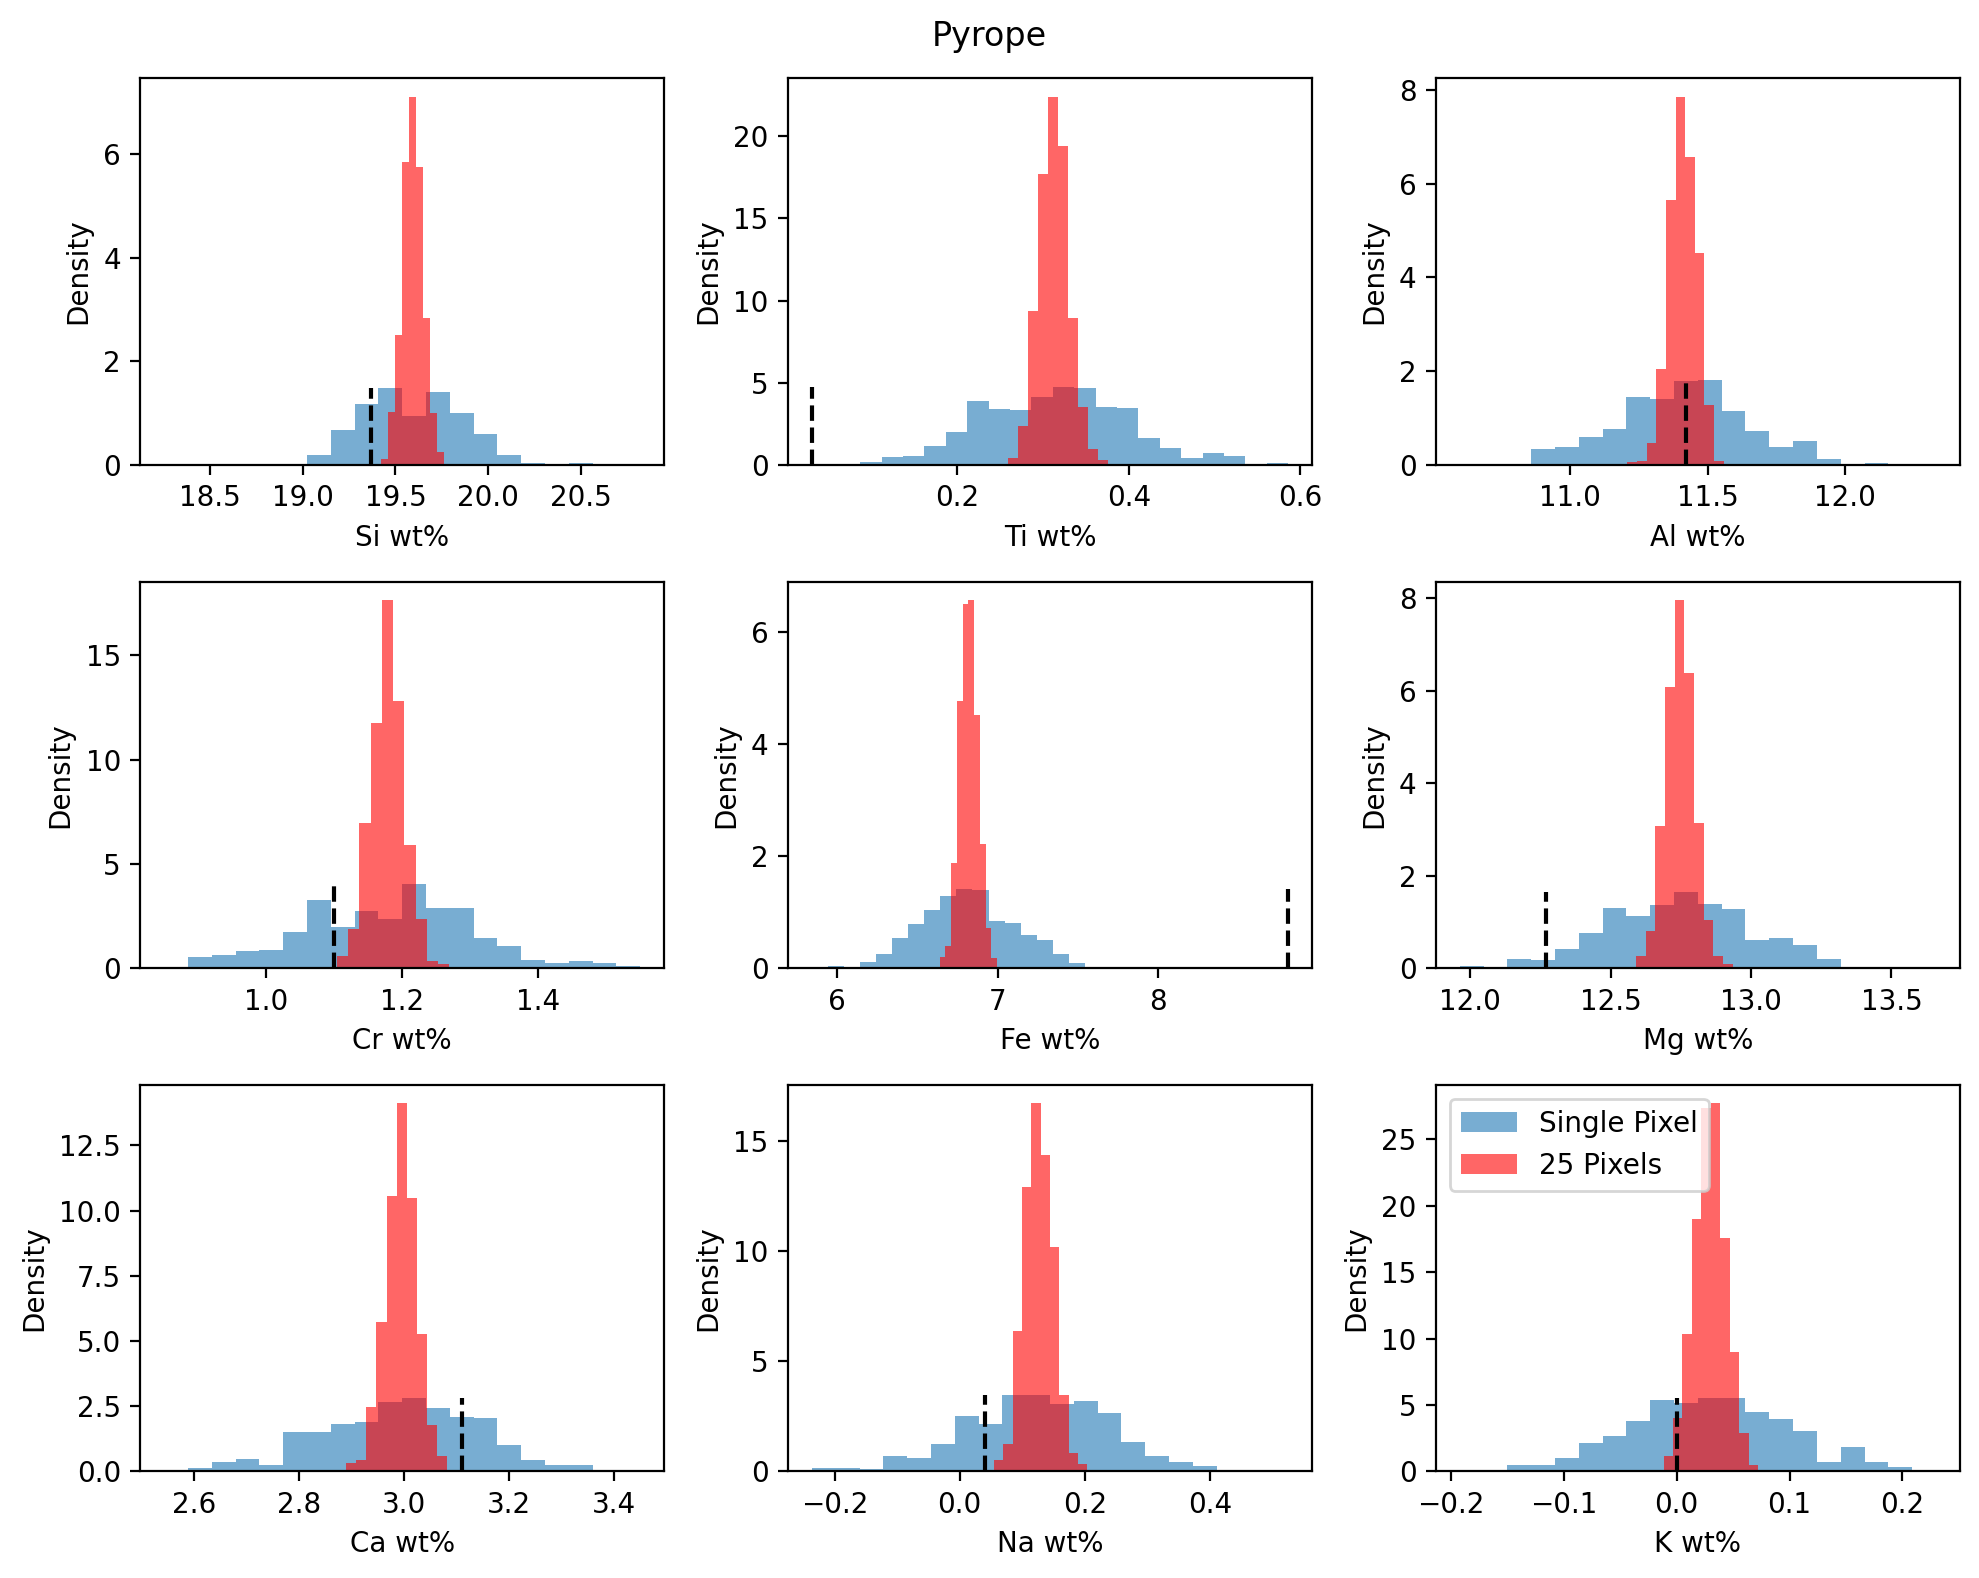

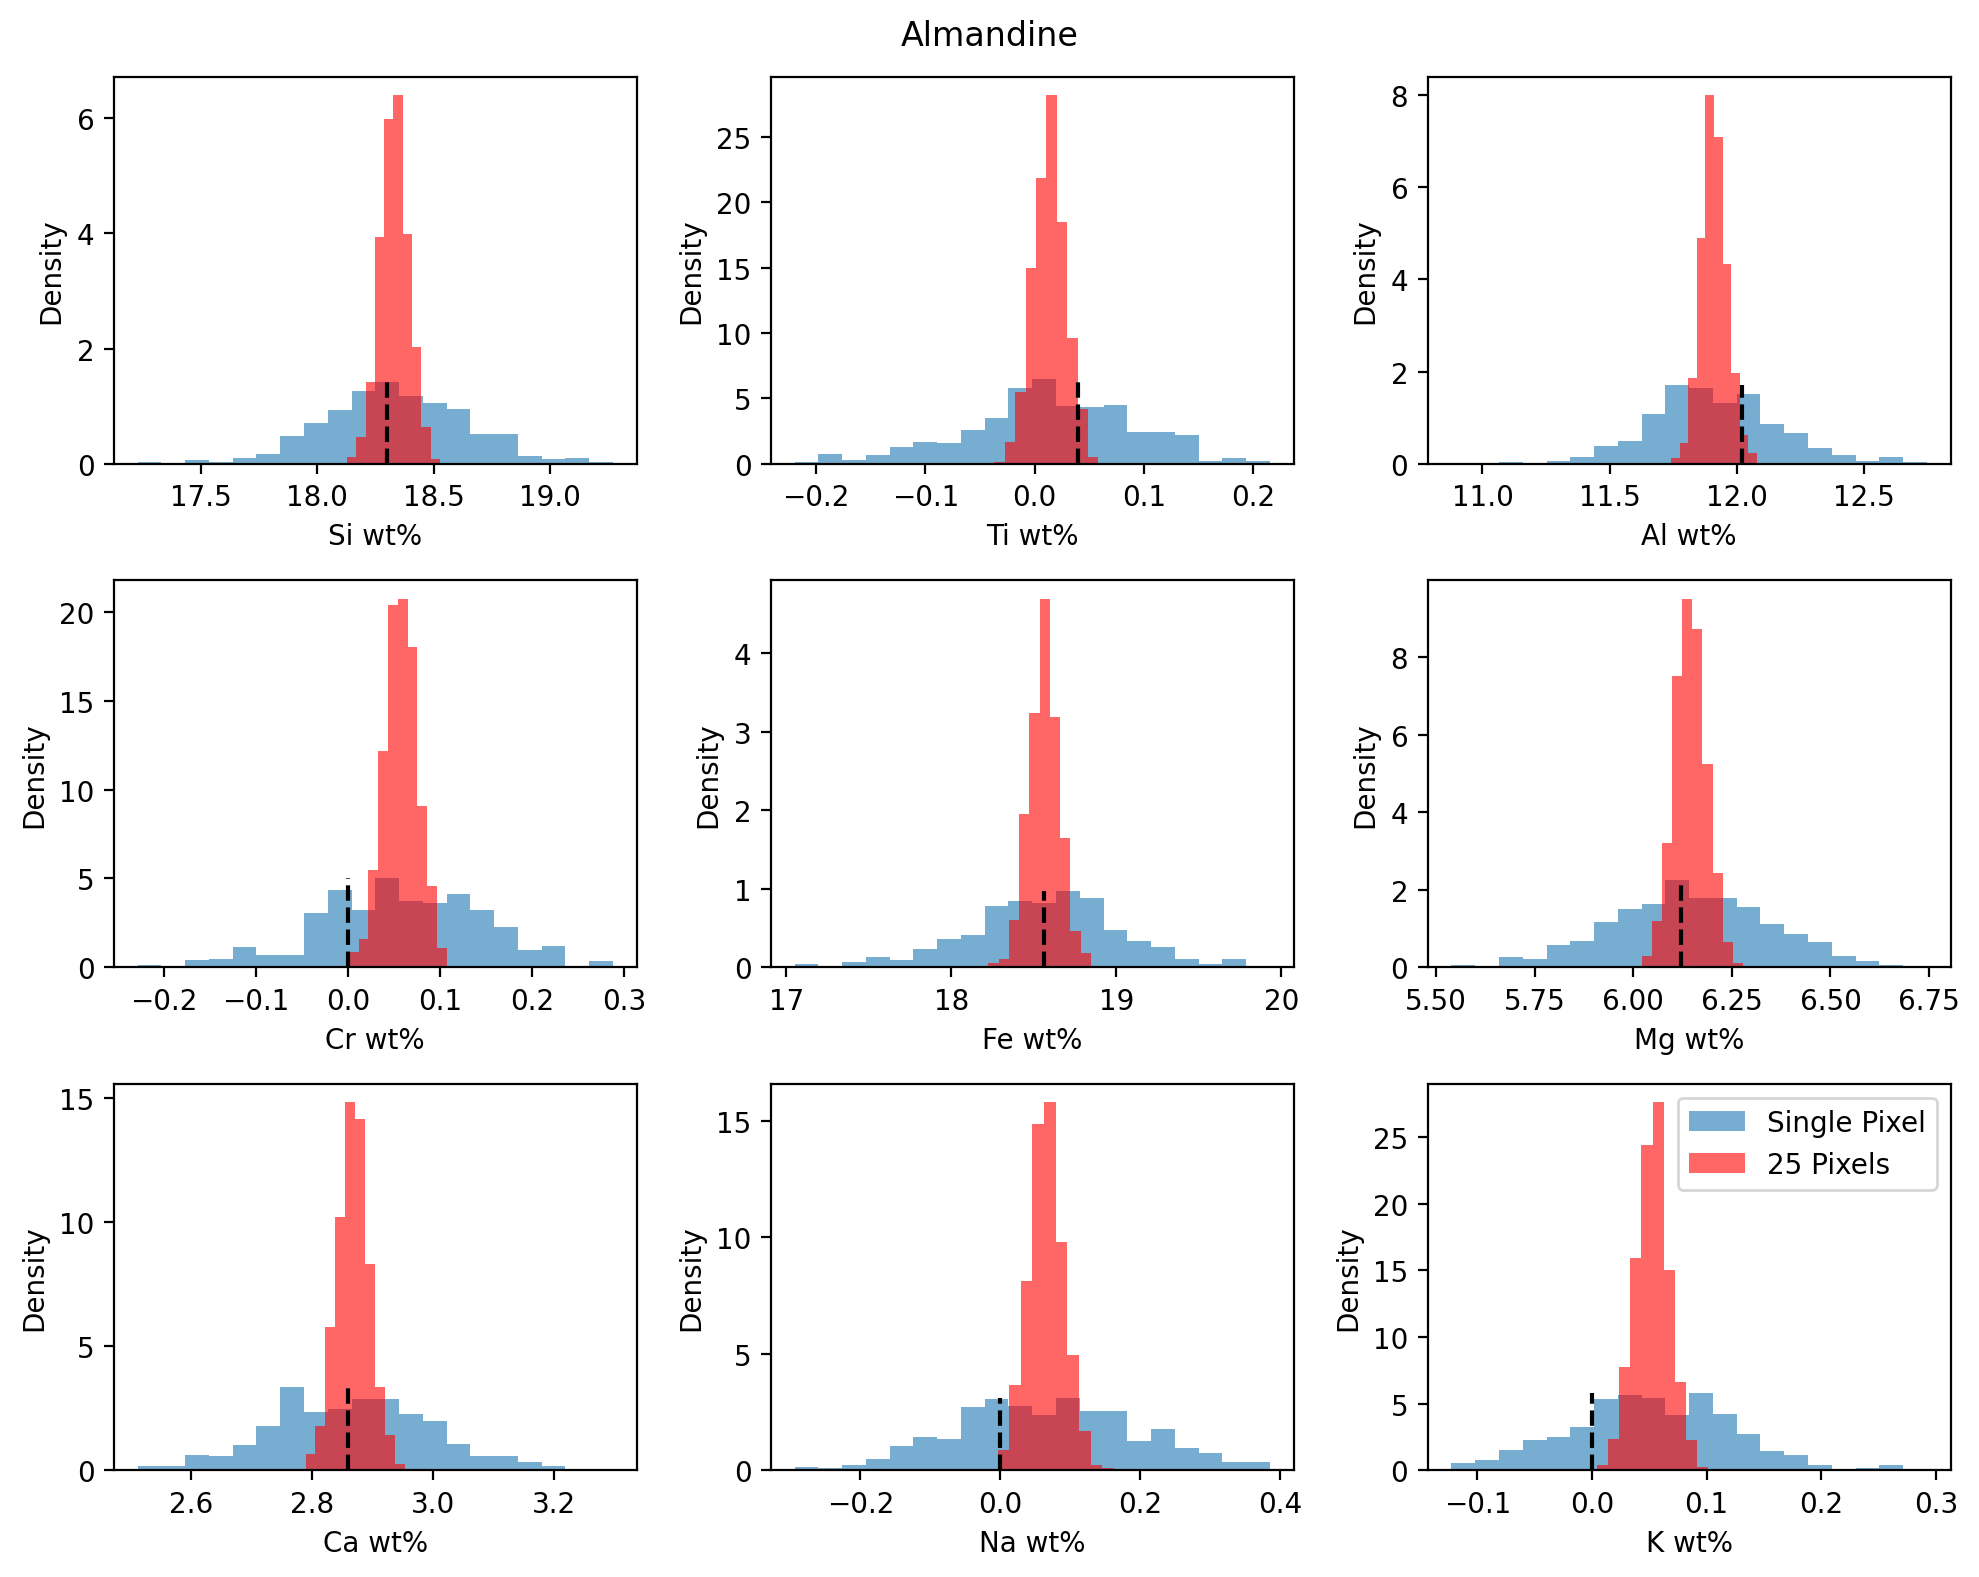

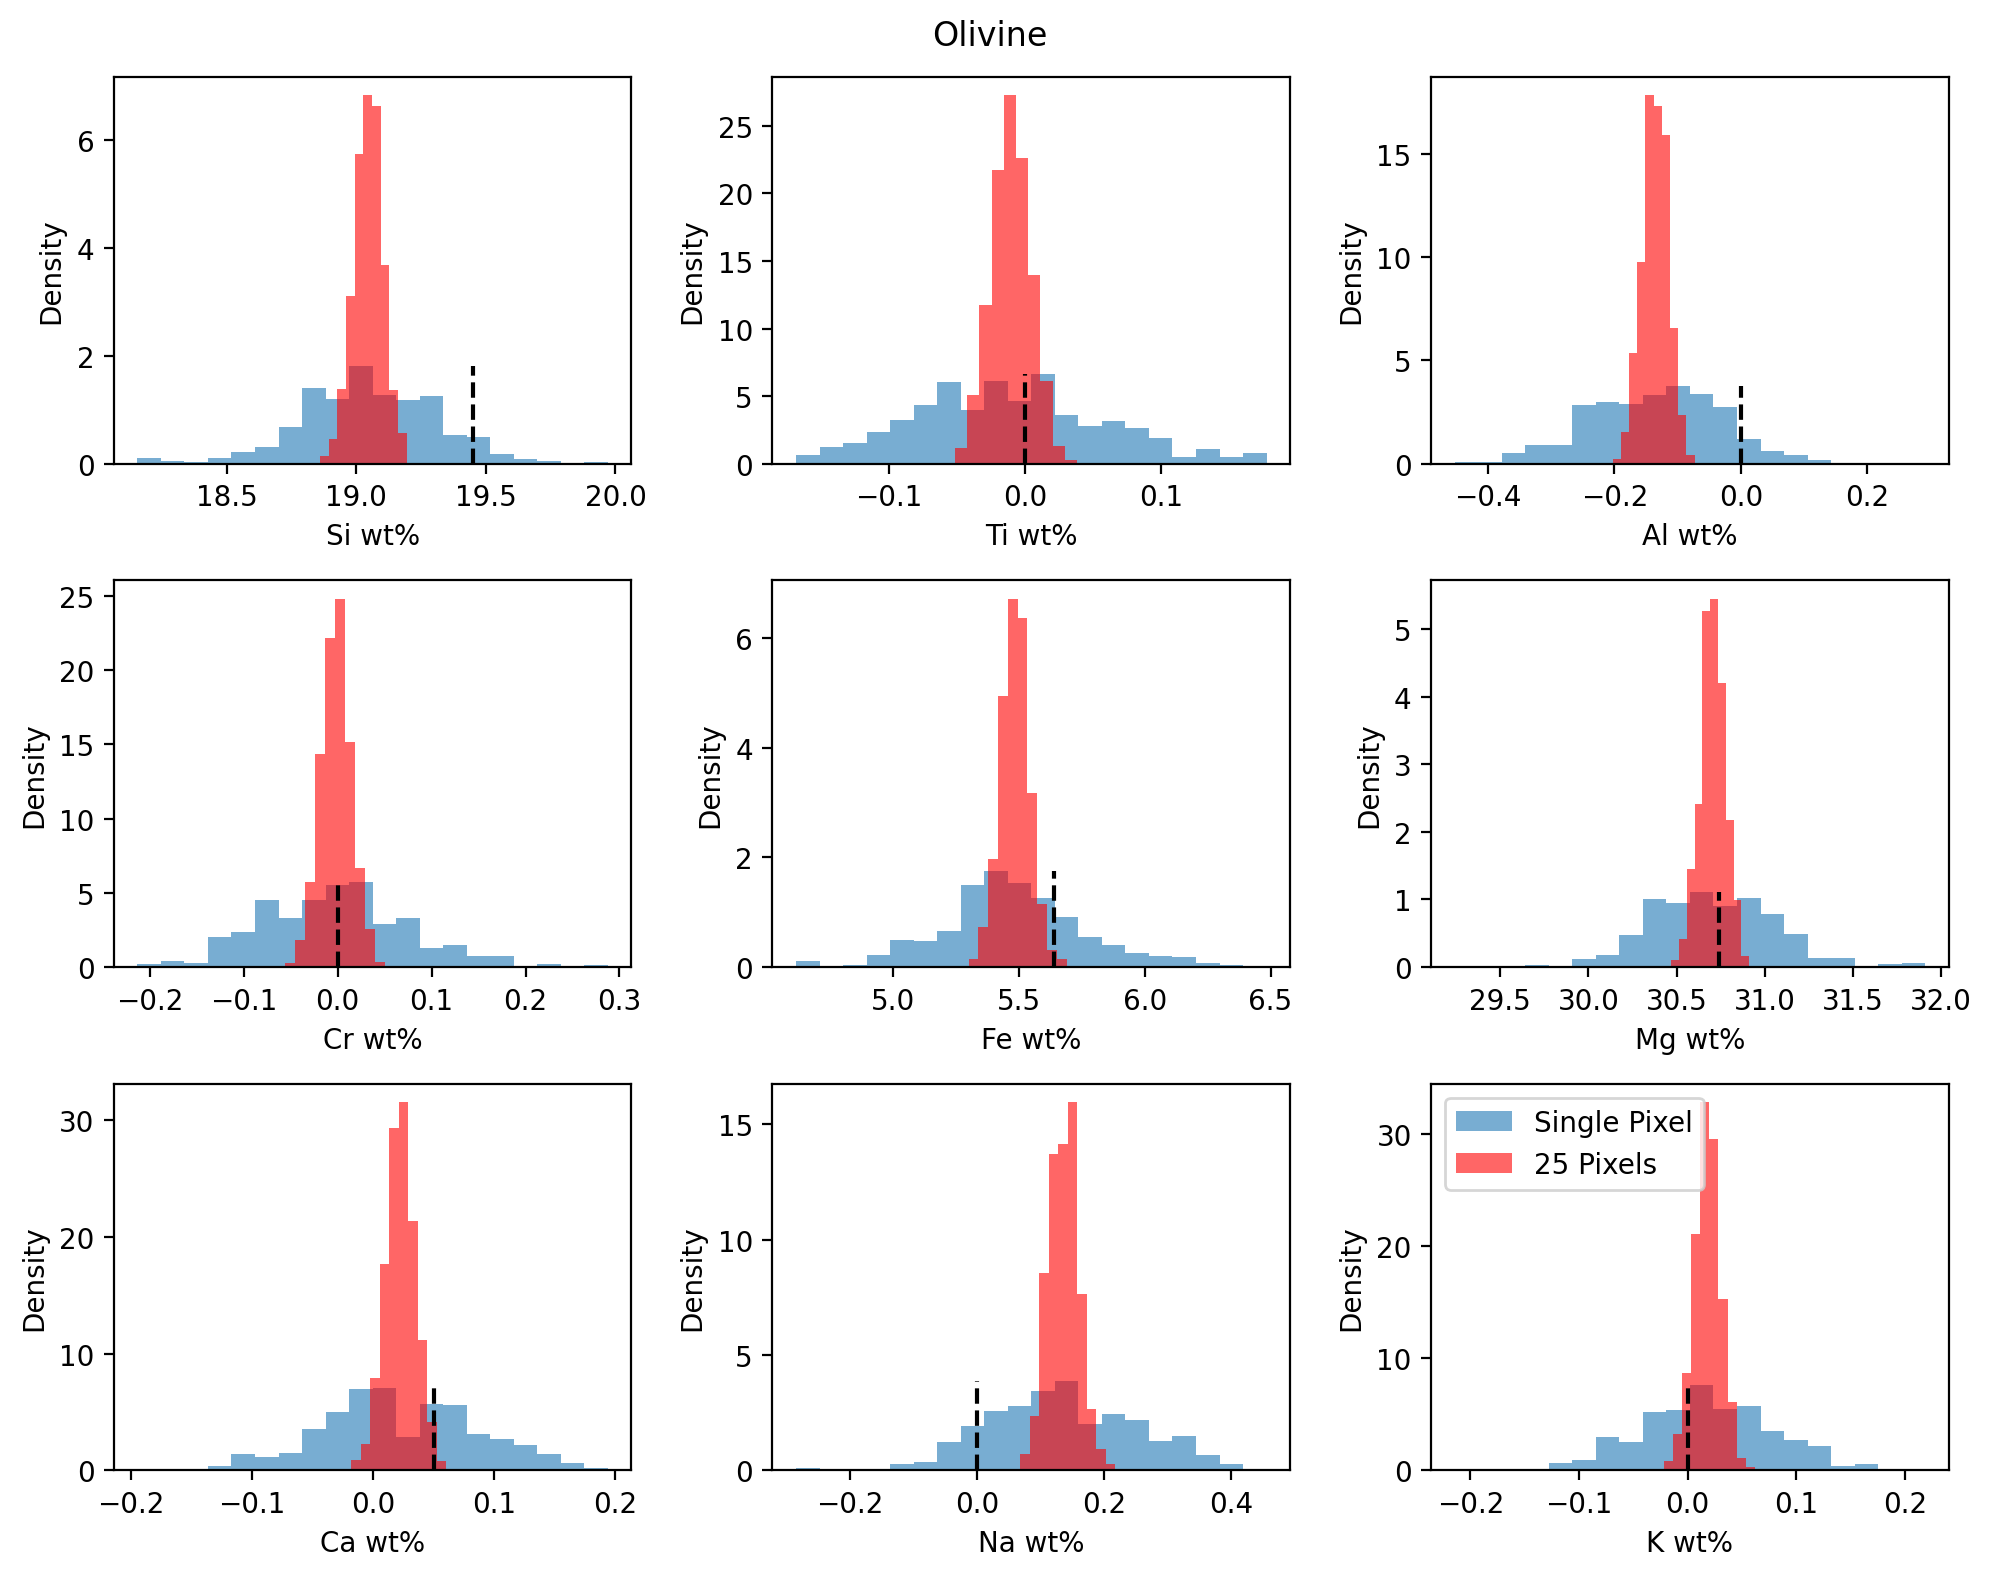

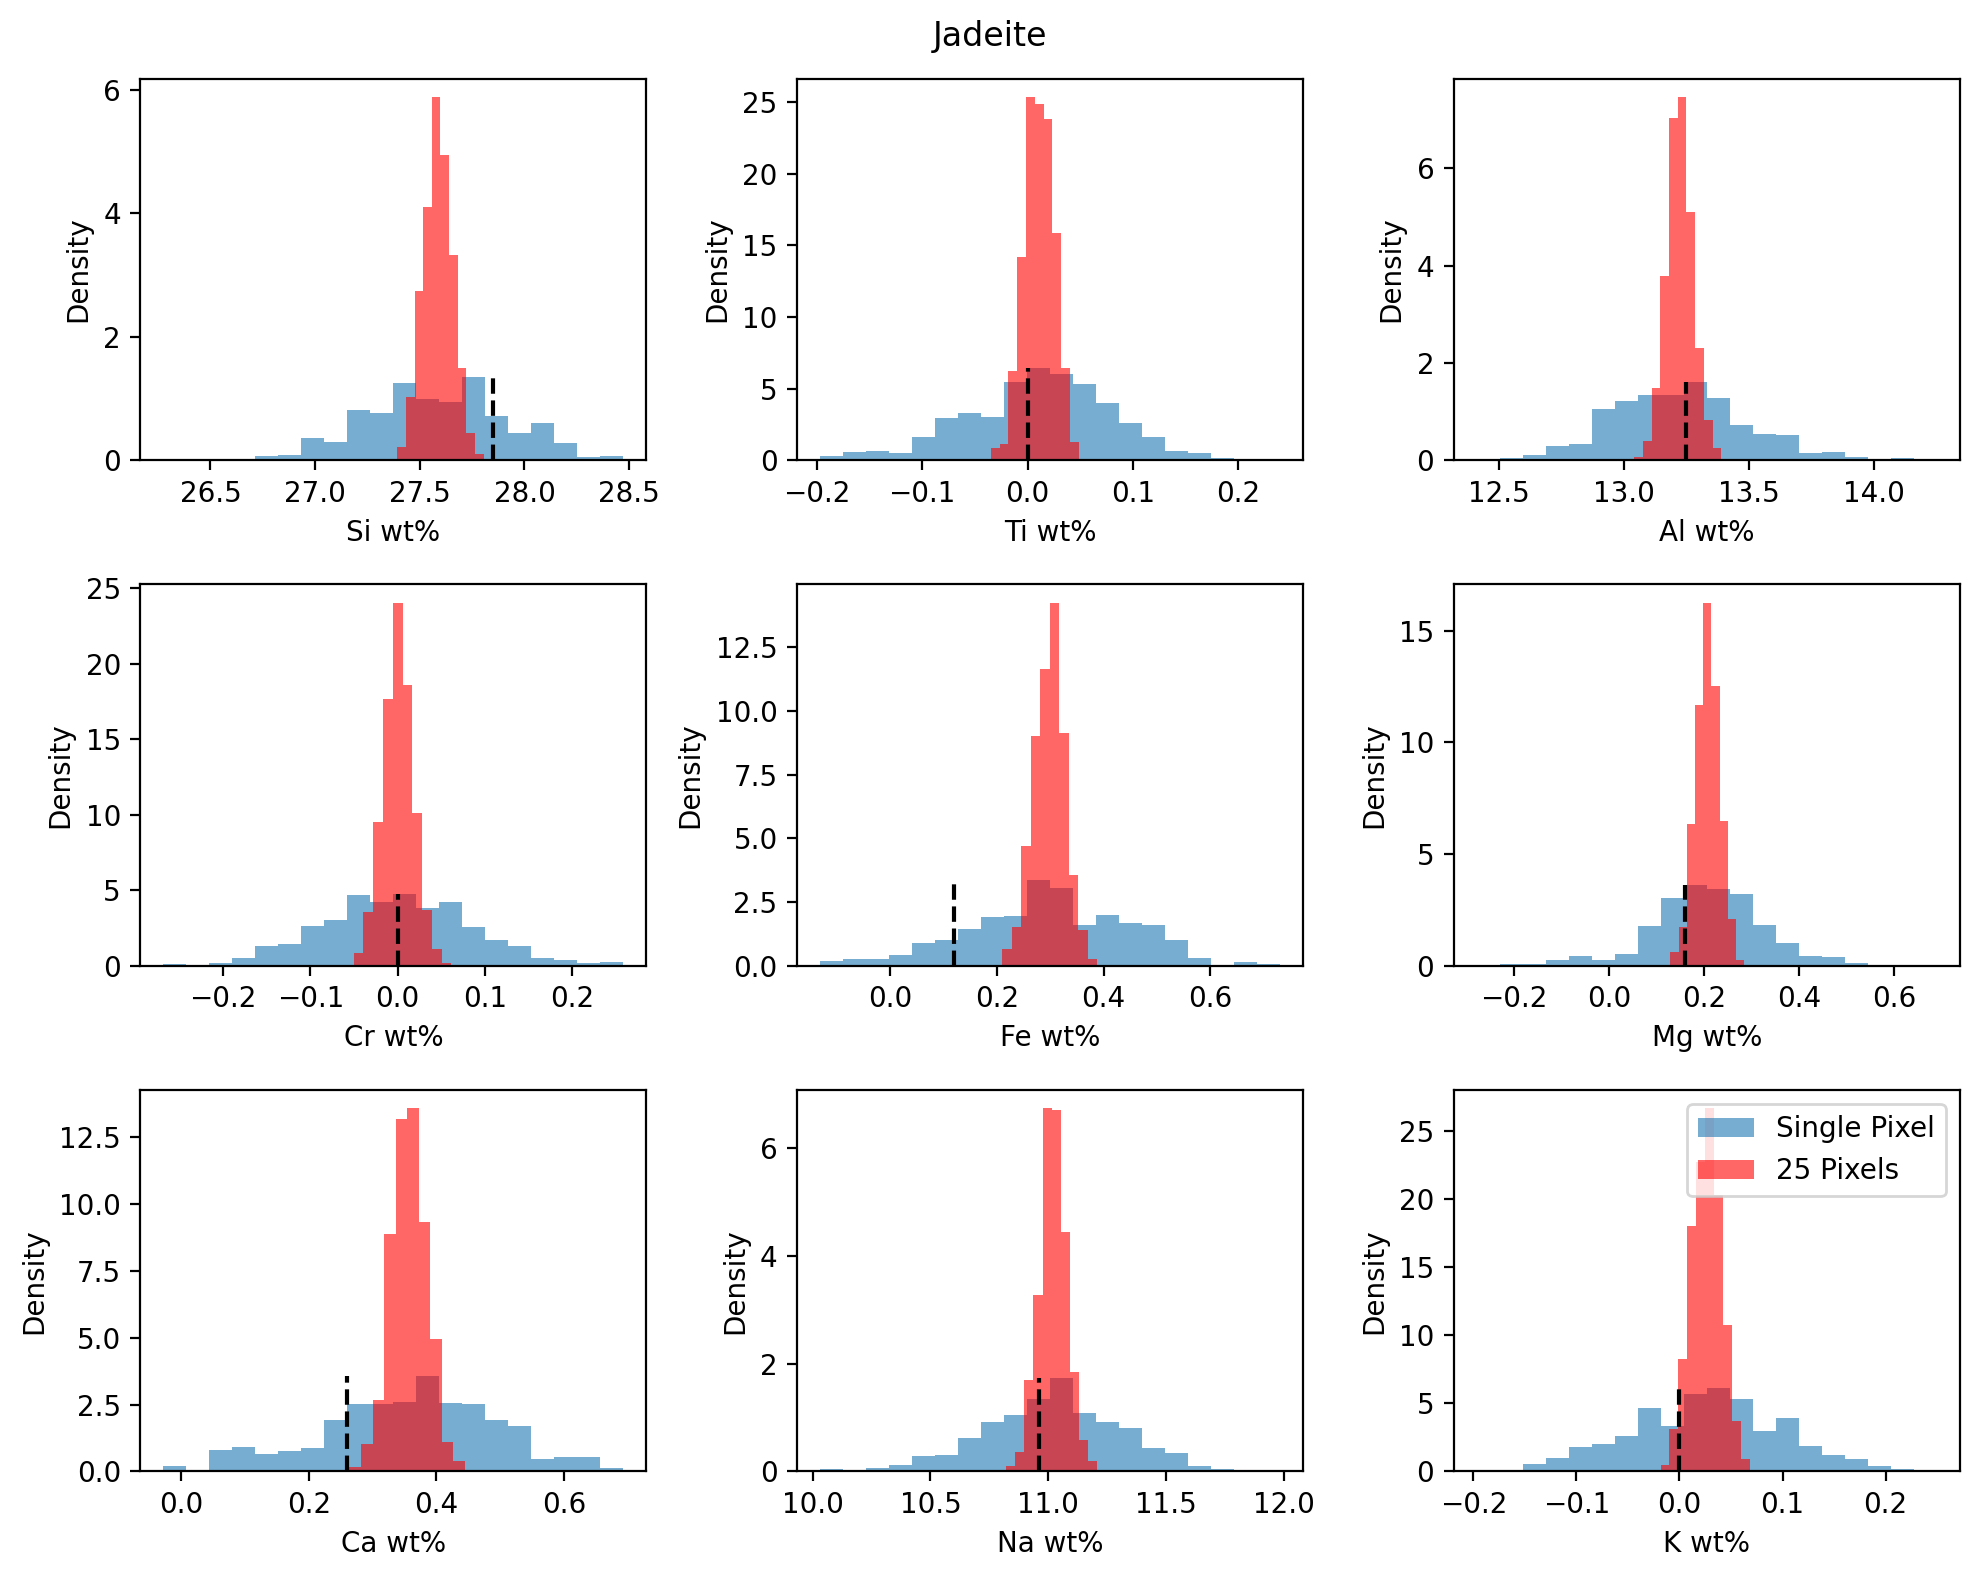

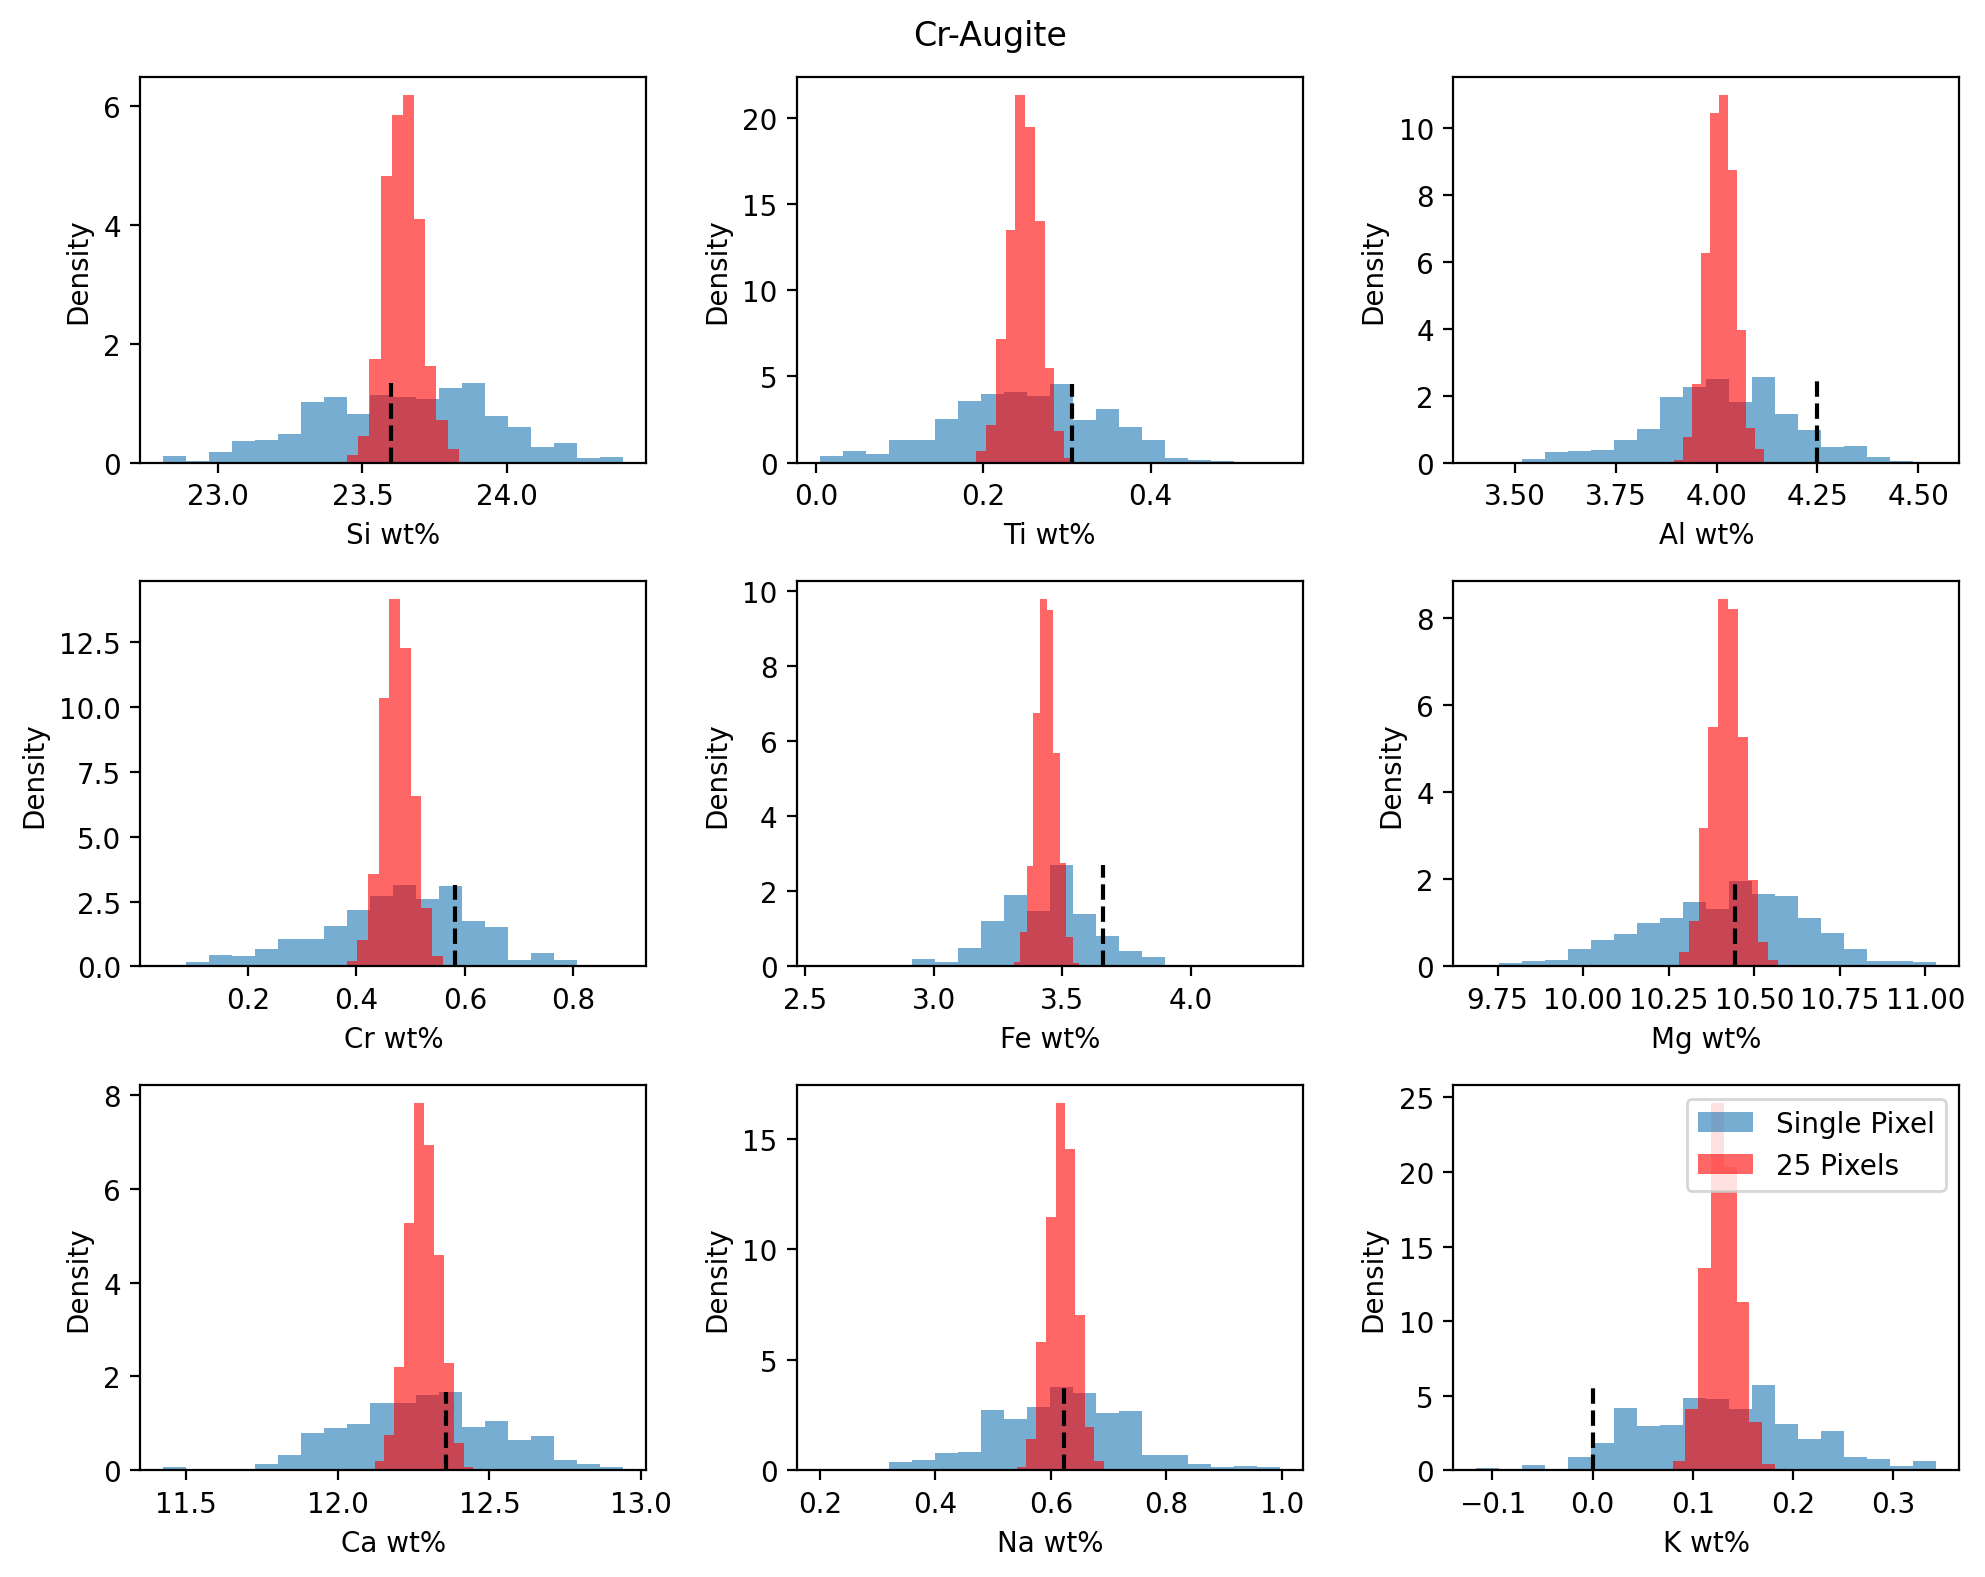

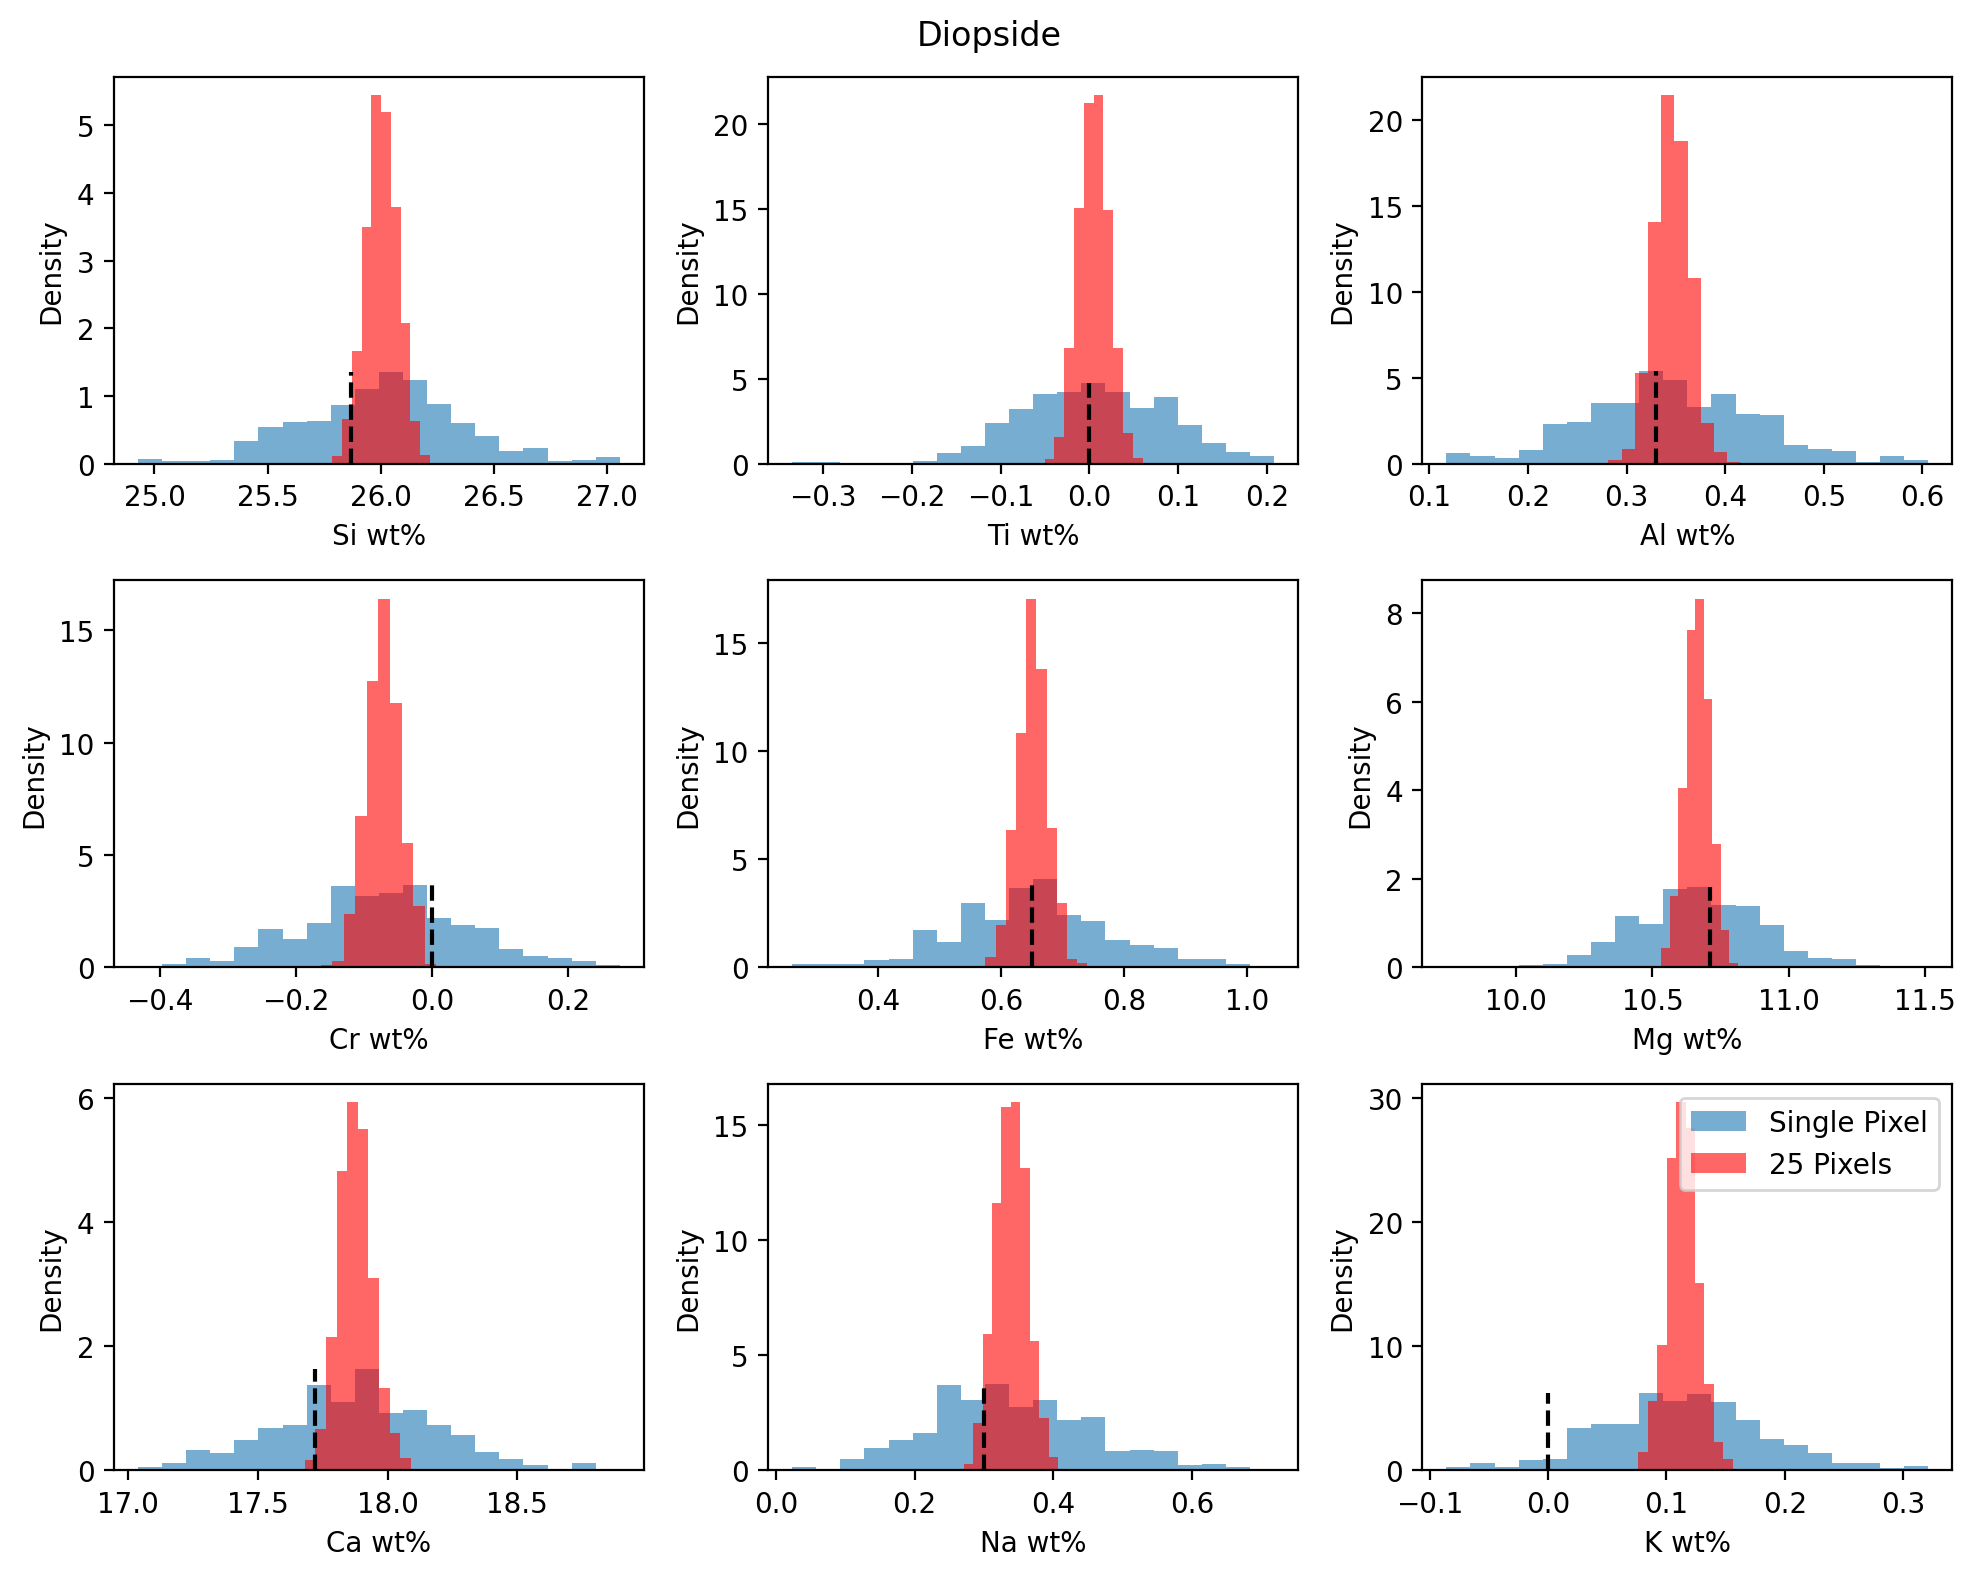

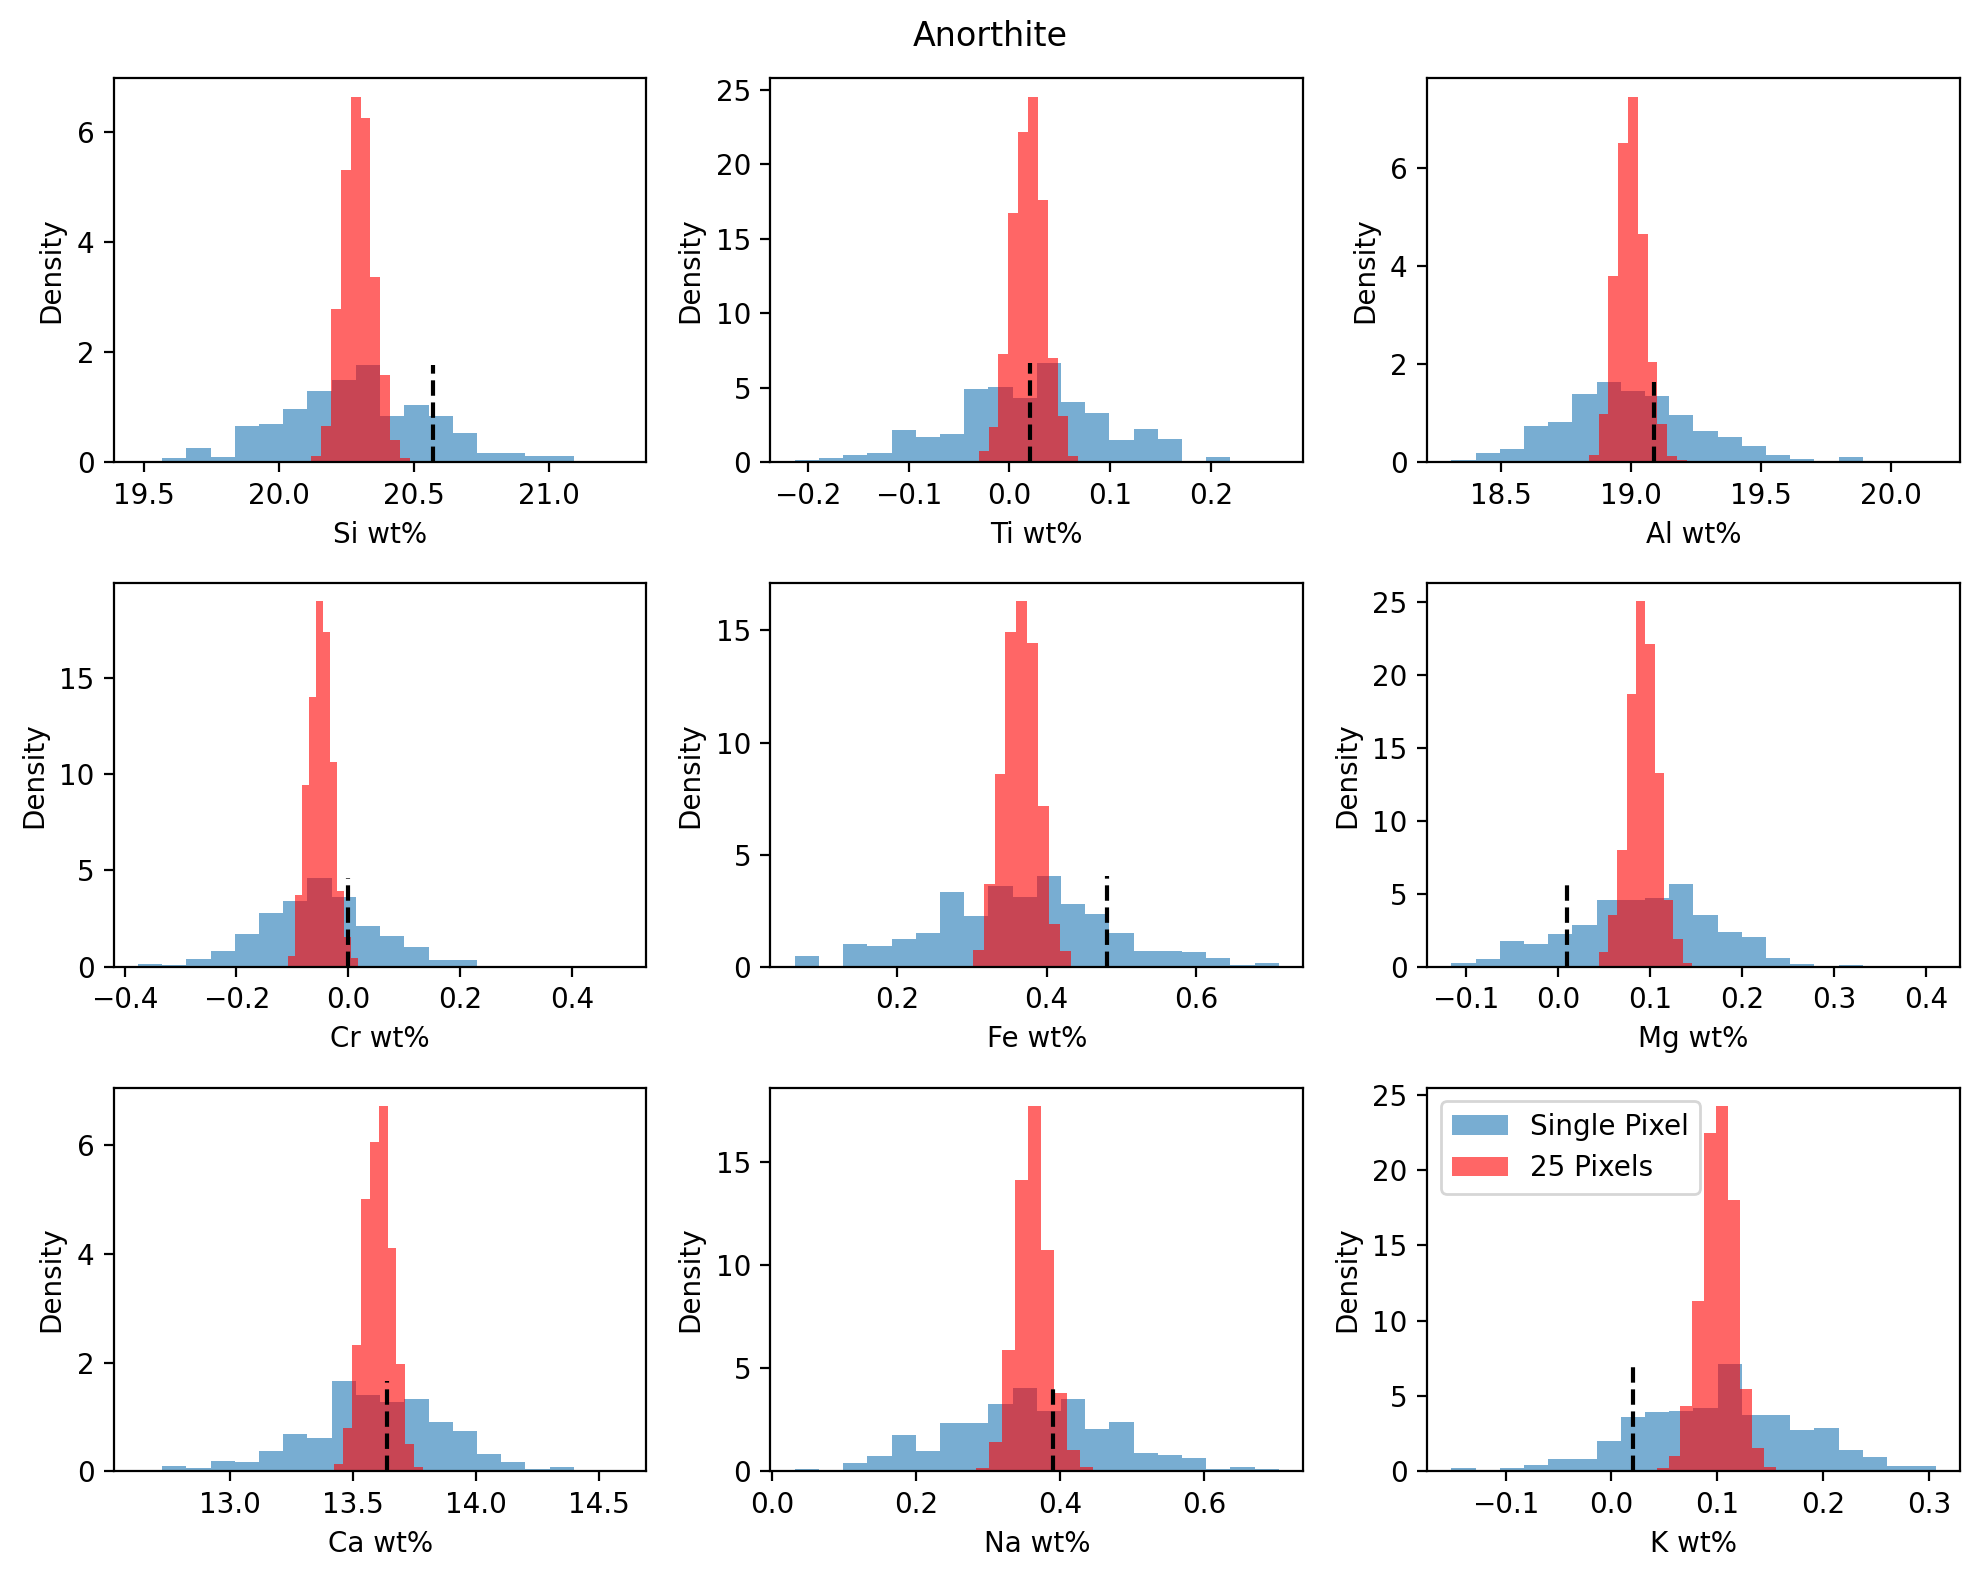

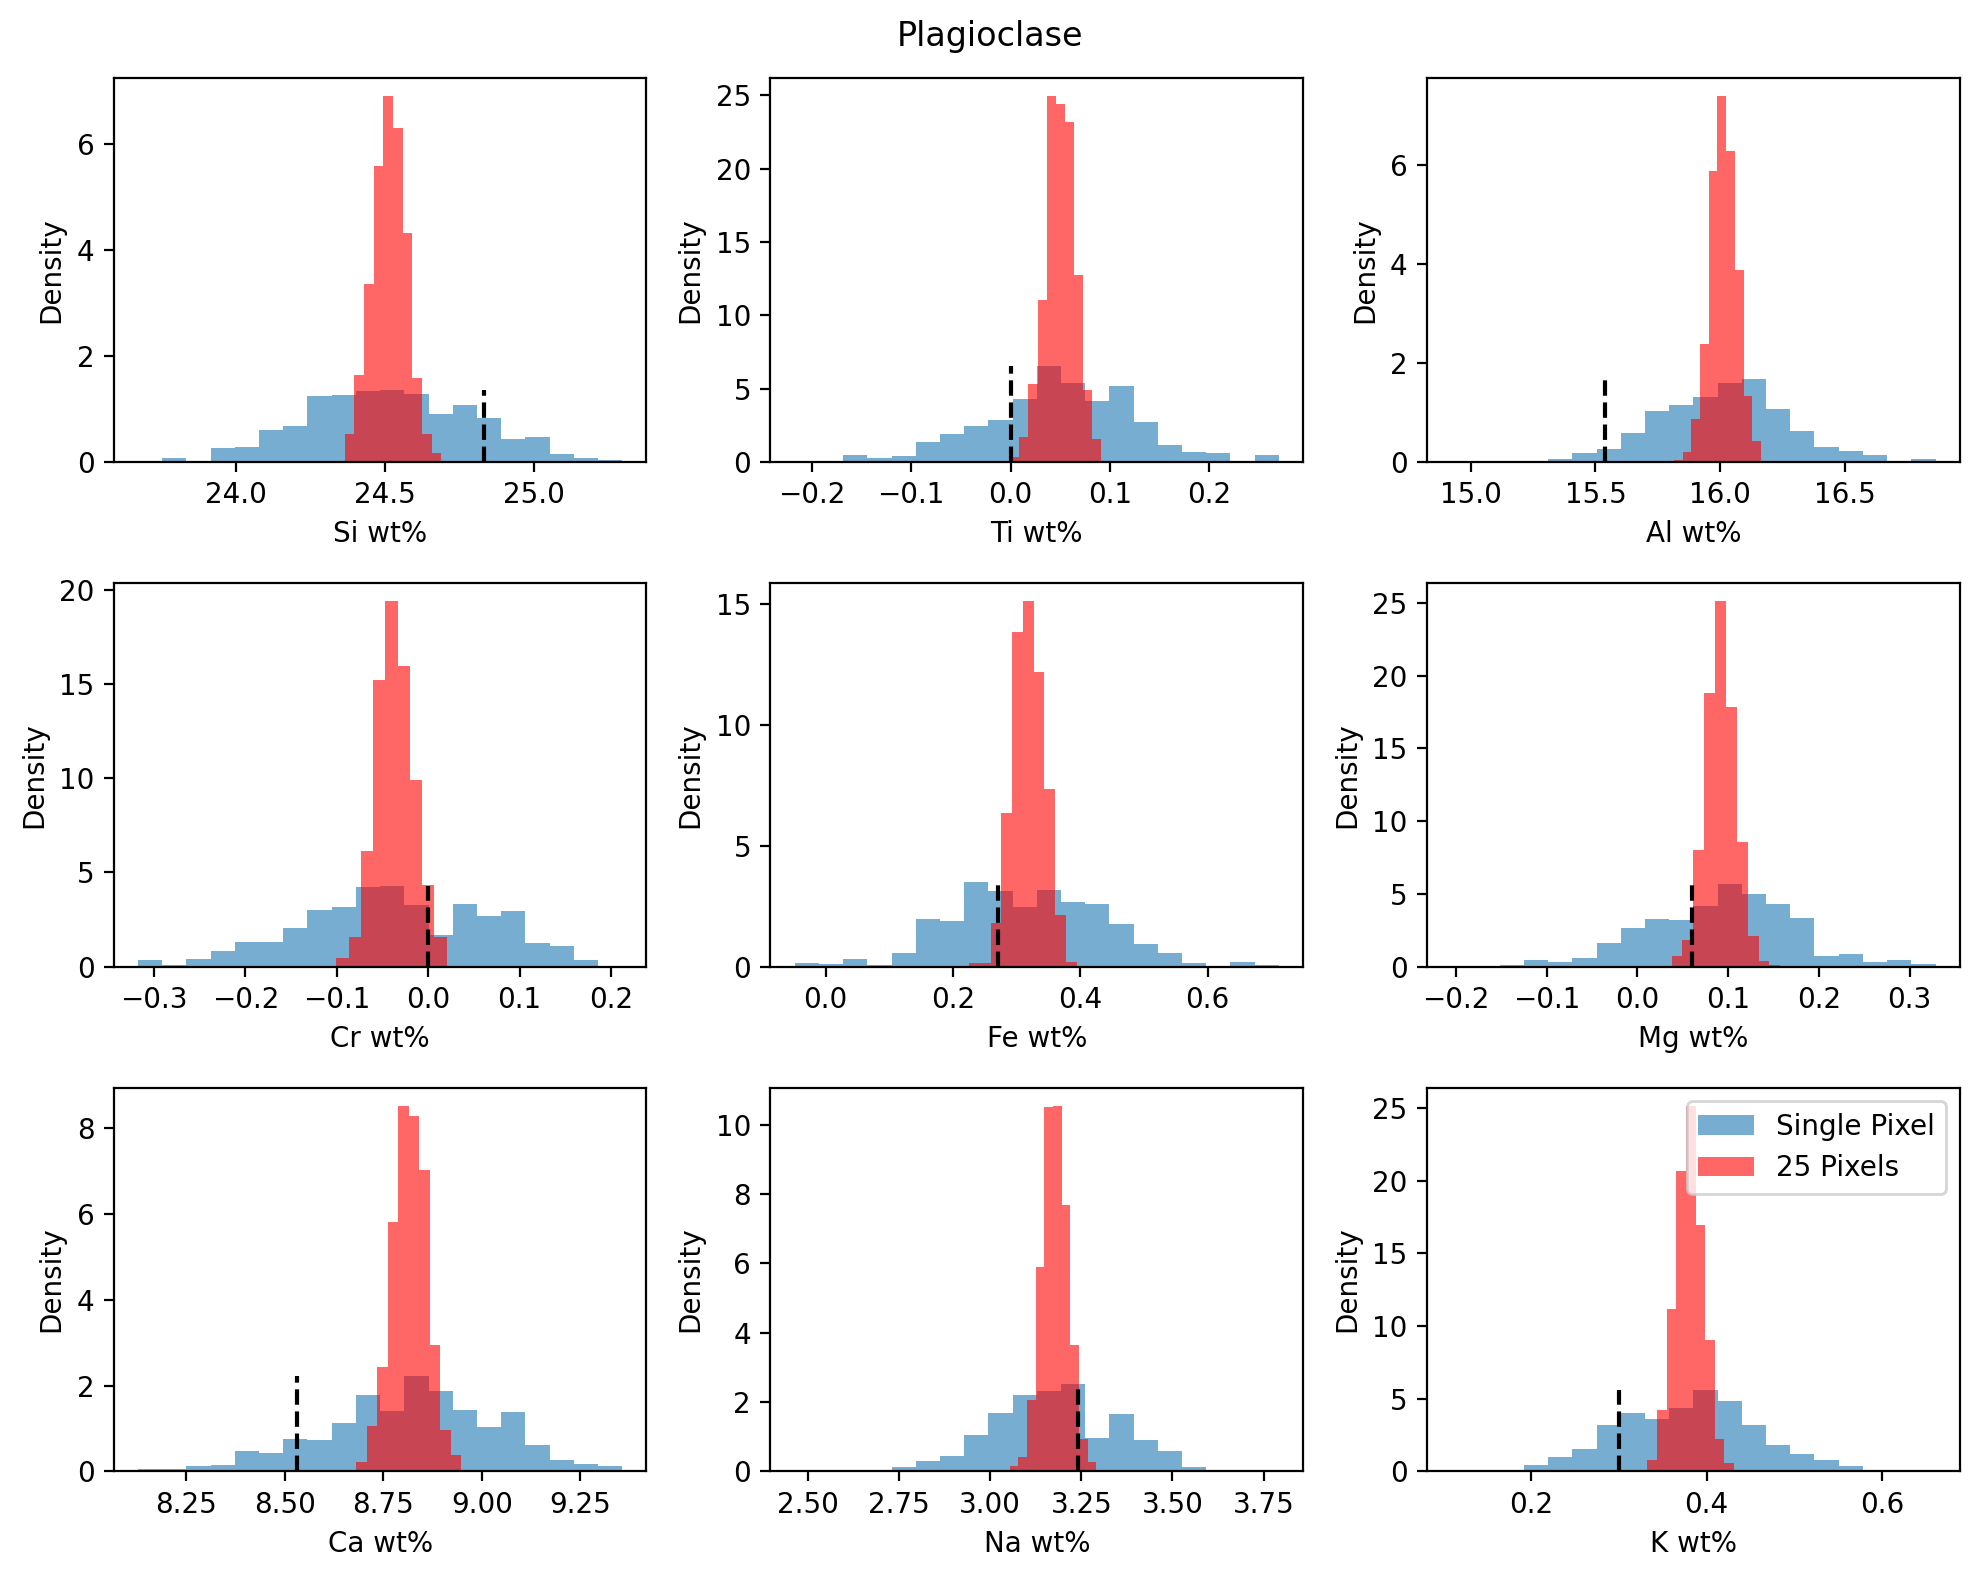

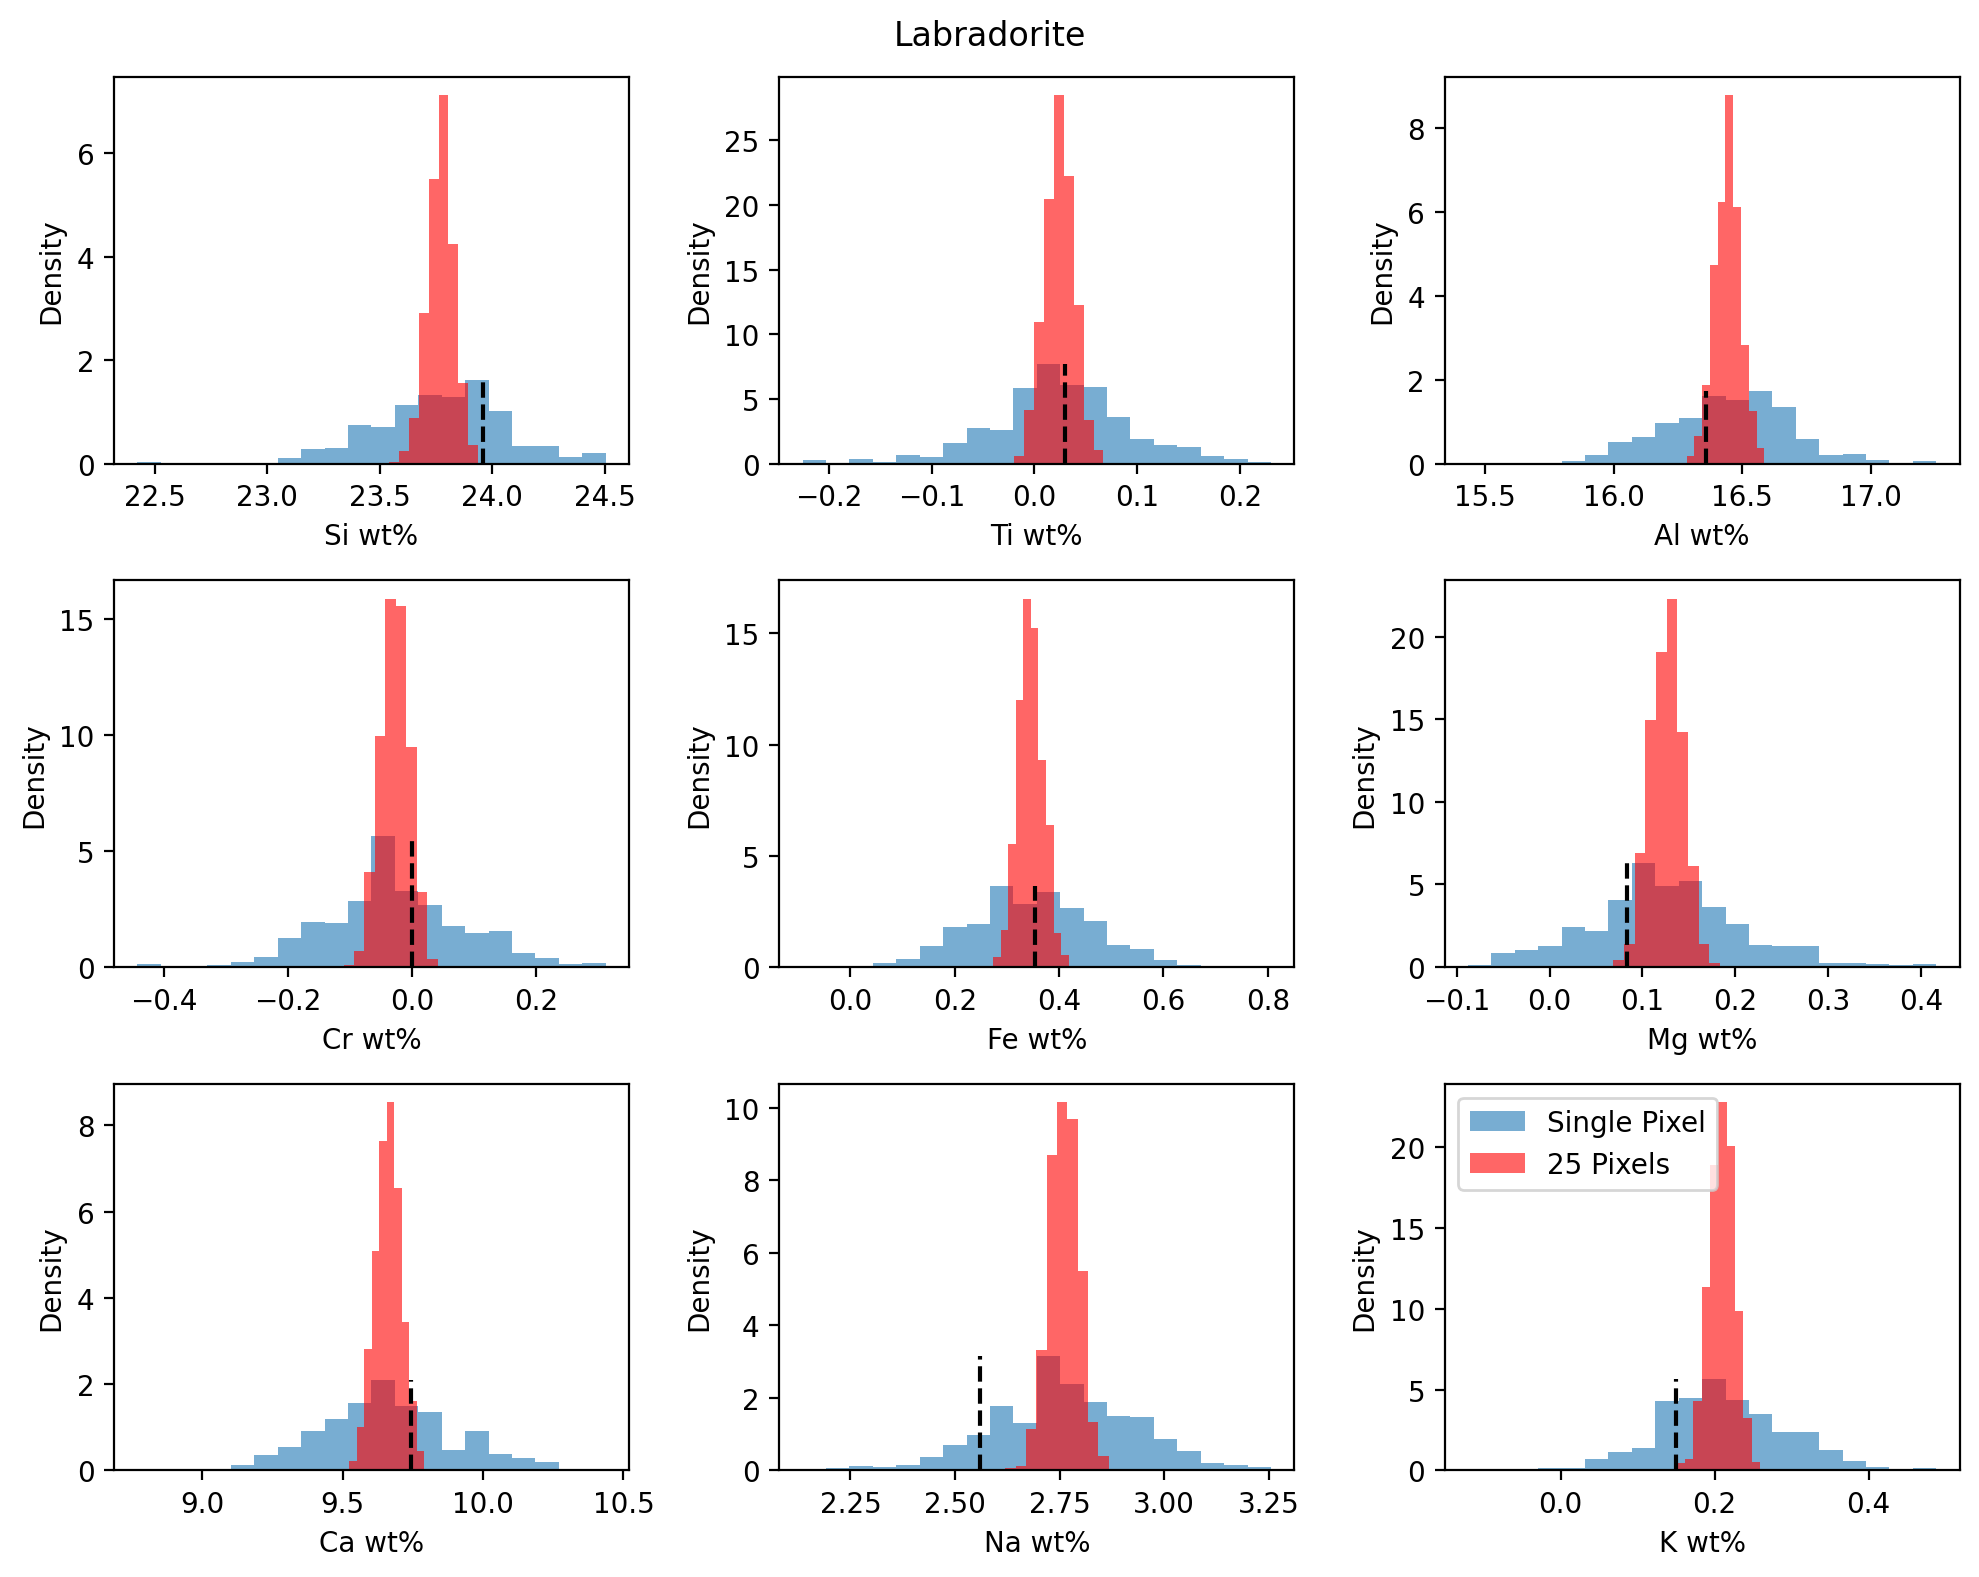

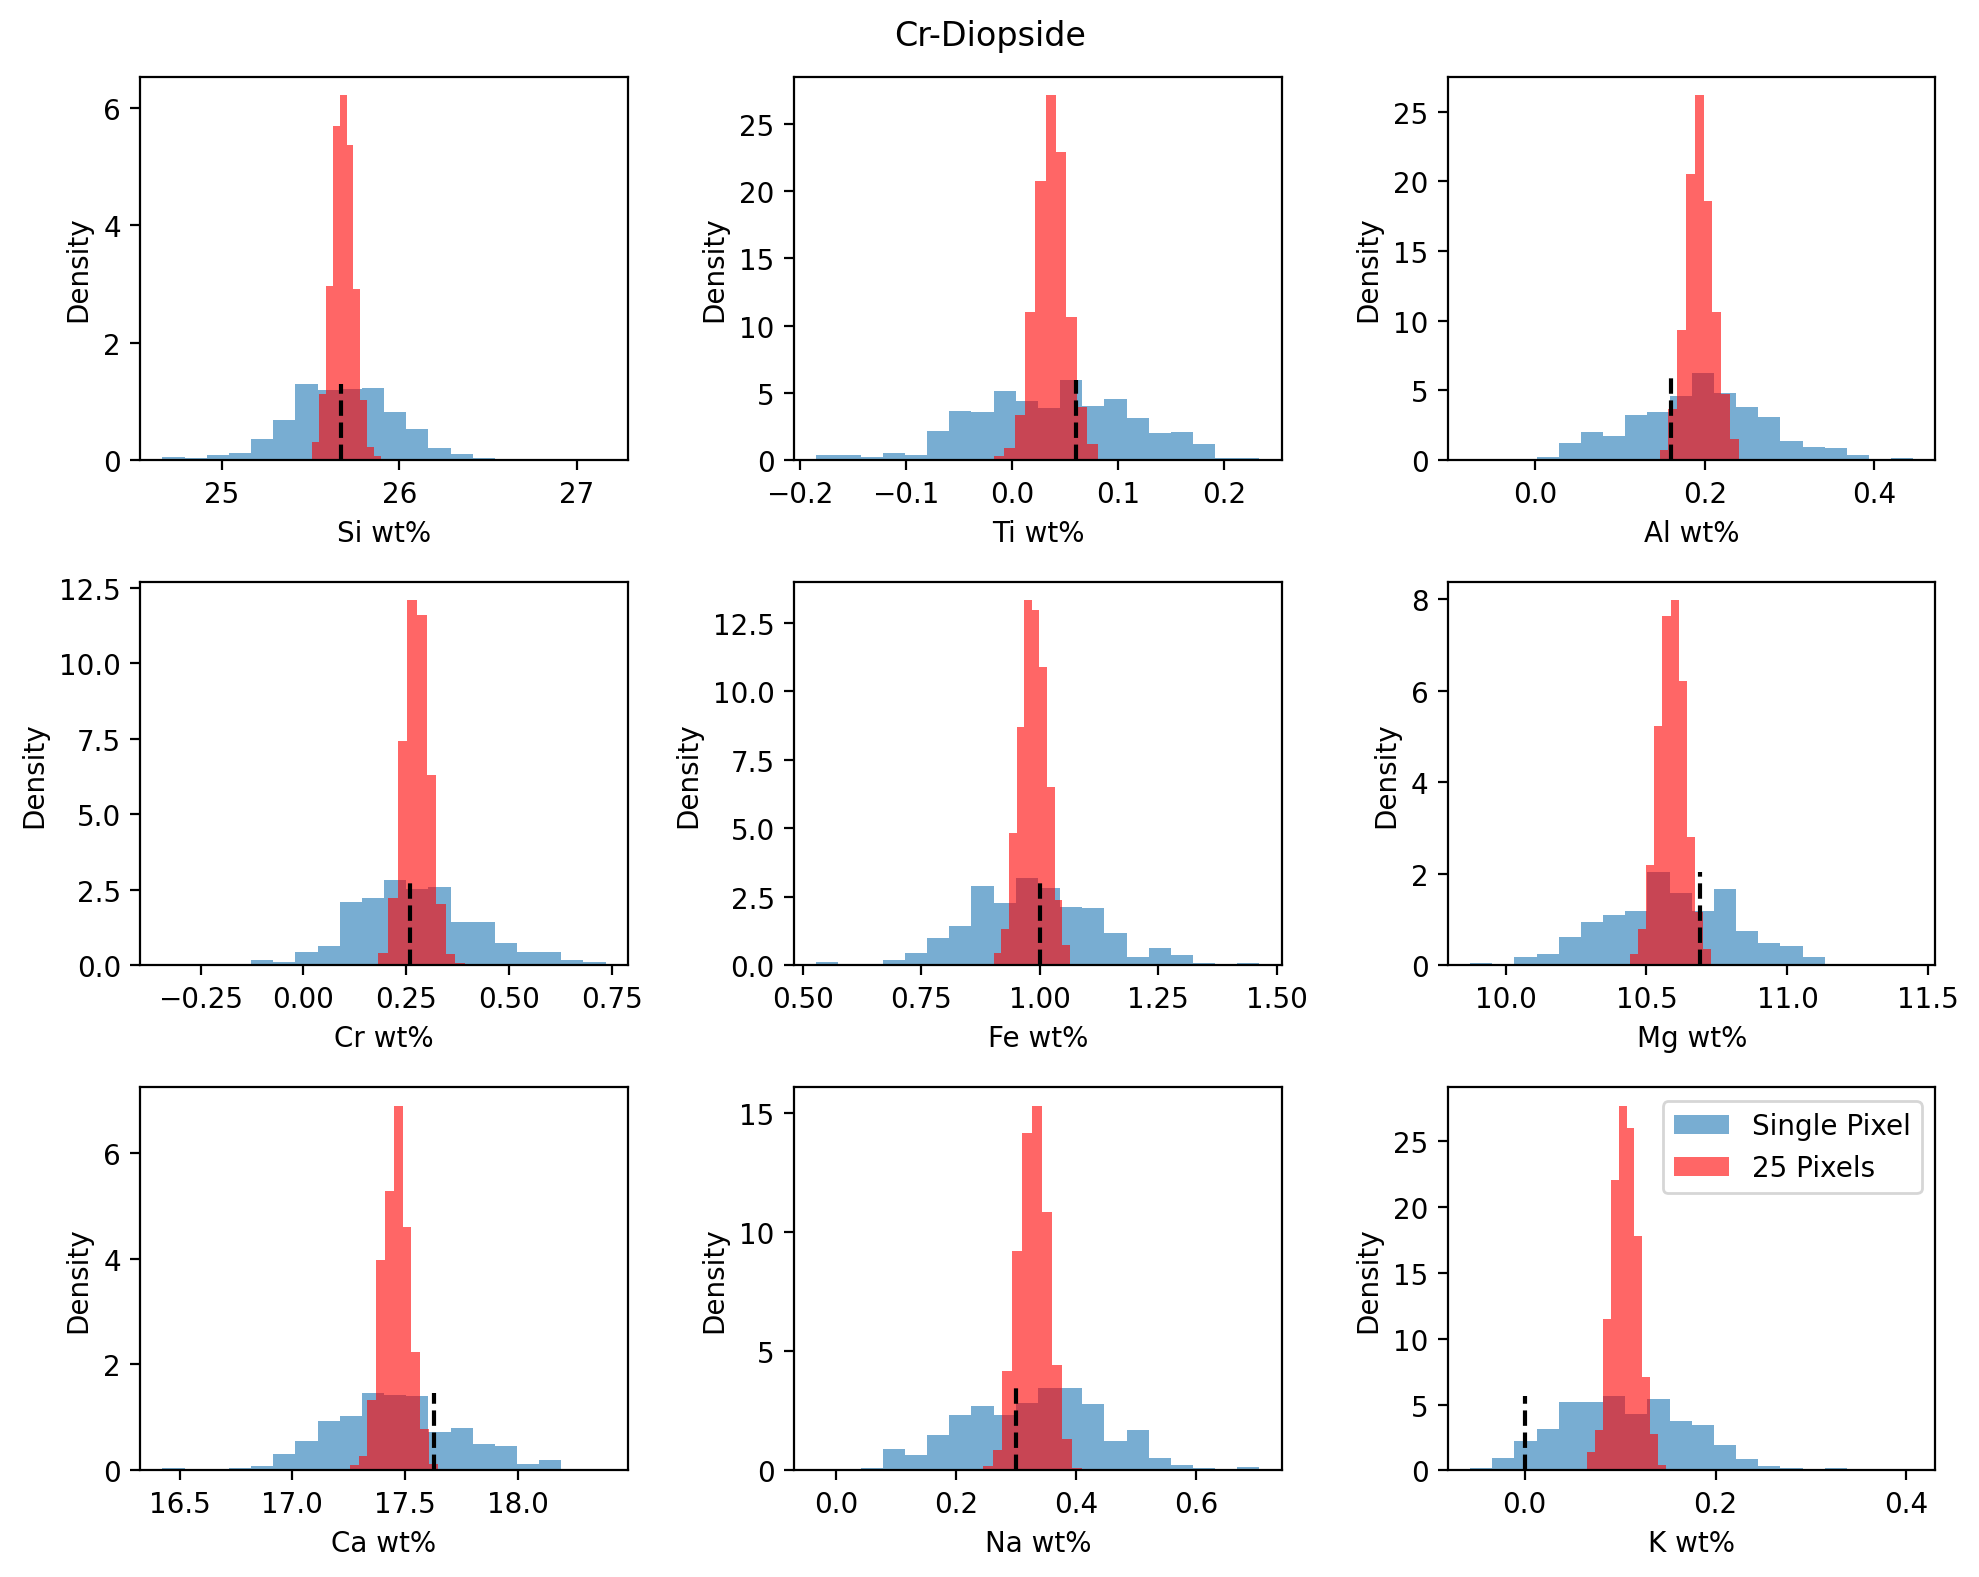

In [6]:
Single, Multi = cm.plot_std_comparison(Conc, Stds, el, Group = 25, output=True)

(-2.0, 20.0)

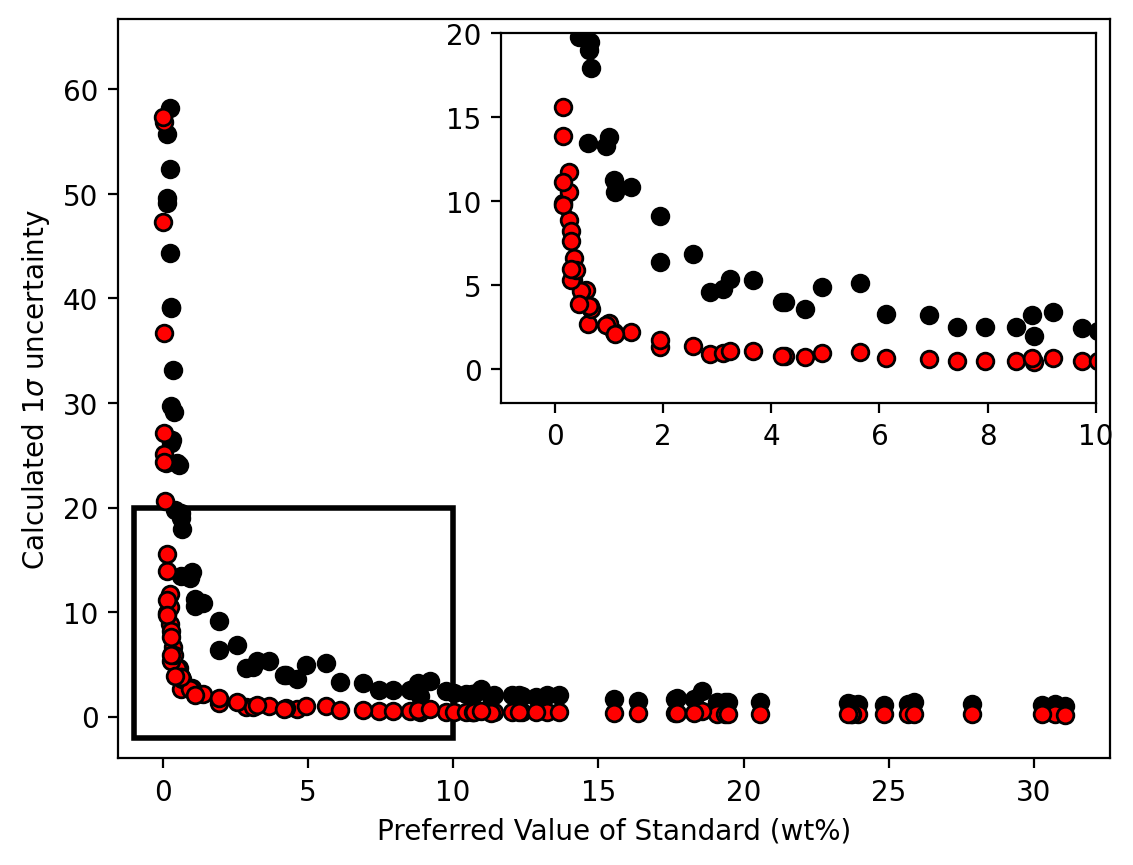

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

rel_error = 100*Single/Stds.set_index('Standard').loc[:,Single.keys()]
rel_error_multi = 100*Multi/Stds.set_index('Standard').loc[:,Multi.keys()]
f, a = plt.subplots(1,1)
a.plot(Stds.set_index('Standard').loc[:,Single.keys()], rel_error, 'ok')
a.plot(Stds.set_index('Standard').loc[:,Multi.keys()], rel_error_multi, 'ok', mfc = 'r')
a.set_ylim([-4,66.70])
a.set_xlabel('Preferred Value of Standard (wt%)')
a.set_ylabel('Calculated 1$\sigma$ uncertainty')

rect = plt.Rectangle((-1, -2), 11, 22, edgecolor='k', facecolor='none', lw=2)
a.add_patch(rect)

ax_inset = inset_axes(a, width="60%", height="50%", loc='upper right')
ax_inset.plot(Stds.set_index('Standard').loc[:, Single.keys()], rel_error, 'ok', label = 'Single Pixel')
ax_inset.plot(Stds.set_index('Standard').loc[:, Multi.keys()], rel_error_multi, 'ok', mfc='r', label = '25 Pixels')
ax_inset.set_xlim([-1, 10])
ax_inset.set_ylim([-2, 20])
